In [3]:
# IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Librerias Clasicas
import pandas as pd

# Librerias de Visualización
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import cufflinks as cf
from ipywidgets import interact

# Librerias de ML
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (20,16)
pd.options.mode.chained_assignment = None  # default='warn'

## CREACIÓN DEL DATA SET

### Importación de los DataSets

In [2]:
demo=pd.read_csv('data/demographic.csv')
diet=pd.read_csv('data/diet.csv')
exam=pd.read_csv('data/examination.csv')
labs=pd.read_csv('data/labs.csv')
meds=pd.read_csv('data/medications.csv',encoding= 'unicode_escape')
quest=pd.read_csv('data/questionnaire.csv')

In [3]:
print('diet:',len(diet.columns))
print('quest:',len(quest.columns))
print('demo:',len(demo.columns))
print('exam:',len(exam.columns))
print('labs:',len(labs.columns))

diet: 168
quest: 953
demo: 47
exam: 224
labs: 424


In [4]:
len(quest.columns)

953

In [5]:
print('diet:',len(diet))
print('quest:',len(quest))
print('demo:',len(demo))
print('exam:',len(exam))
print('labs:',len(labs))

diet: 9813
quest: 10175
demo: 10175
exam: 9813
labs: 9813


### Renombramos variables de los Datasets

In [6]:
# DEMO

In [7]:
# Creamos un nuevo dataframe con aquellas columnas que nos interesan
demo_df=demo[['SEQN','RIAGENDR','RIDAGEYR','DMDBORN4','DMDEDUC2','DMDMARTL','DMDFMSIZ','INDFMIN2']]

In [8]:
demo_df.rename(columns={'SEQN':'ID','RIAGENDR':'GENERO','RIDAGEYR':'EDAD','DMDBORN4':'LUGAR_NACIMIENTO','DMDEDUC2':'NIVEL_FORMACION','DMDMARTL':'ESTADO_CIVIL','DMDFMSIZ':'RESIDENTES_HOGAR','INDFMIN2':'INGRESOS_HOGAR'},inplace=True)

In [9]:
demo_df

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR
0,73557,1,69,1,3.0,4.0,3,4.0
1,73558,1,54,1,3.0,1.0,4,7.0
2,73559,1,72,1,4.0,1.0,2,10.0
3,73560,1,9,1,NaN,NaN,4,9.0
4,73561,2,73,1,5.0,1.0,2,15.0
...,...,...,...,...,...,...,...,...
10170,83727,1,26,1,5.0,5.0,5,77.0
10171,83728,2,2,1,NaN,NaN,4,8.0
10172,83729,2,42,2,5.0,3.0,1,7.0
10173,83730,1,7,1,NaN,NaN,4,6.0


In [10]:
# EXAM

In [11]:
exam_df=exam[['SEQN','BMXWT','BMXHT','BMXBMI','BMXWAIST','BPXPLS','BPXSY1','BPXDI1']]

In [12]:
exam_df.rename(columns={'SEQN':'ID','BMXWT':'PESO_KG','BMXHT':'ALTURA_CM','BMXBMI':'IMC','BMXWAIST':'CIRCUM_CINTURA','BPXPLS':'PULSO_60s','BPXSY1':'PRESION_SISTOLICA','BPXDI1':'PRESION_DIASTOLICA'},inplace=True)

In [13]:
exam_df

,ID,PESO_KG,ALTURA_CM,IMC,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA
0,73557,78.3,171.3,26.7,100.0,86.0,122.0,72.0
1,73558,89.5,176.8,28.6,107.6,74.0,156.0,62.0
2,73559,88.9,175.3,28.9,109.2,68.0,140.0,90.0
3,73560,32.2,137.3,17.1,61.0,64.0,108.0,38.0
4,73561,52.0,162.4,19.7,NaN,92.0,136.0,86.0
...,...,...,...,...,...,...,...,...
9808,83727,71.8,171.3,24.5,87.1,60.0,110.0,68.0
9809,83728,11.3,84.4,15.9,47.2,NaN,NaN,NaN
9810,83729,89.6,162.3,34.0,102.7,80.0,136.0,82.0
9811,83730,22.8,119.1,16.1,53.0,NaN,NaN,NaN


In [14]:
# QUEST

In [15]:
quest_df=quest[['SEQN','INQ060','INQ030','INDFMMPI','ALQ130','DED120','DBD895','DBD900','DBD905','DUQ219','HIQ011','HUQ051','DPQ060','DPQ040','DIQ010','MCQ010','MCQ220','OCQ180','PAD675','PAD680','RHQ131','RHQ160','SLD010H','SMQ040','SMD650','DBQ700','DPQ050','MCQ160C','WHQ030','WHQ040','WHQ070','WHD050']]

In [16]:
quest_df.rename(columns={'SEQN':'ID','INQ060':'INGRESOS_DISCAPACIDAD','INQ030':'INGRESOS_SEGURIDAD_SOCIAL','INDFMMPI':'INDICE_POBREZA','ALQ130':'BEBIDAS_ALCOHOL_DIA','DED120':'MINUTOS_OUTDOOR','DBD895':'NUM_COMIDAS FUERA_7 DIAS','DBD900':'NUM_FAST FOOD_7_DIAS','DBD905':'COMIDA_PREPROCESADA_30_DÍAS','DUQ219':'FREC.CONSUMO_DROGAS','HIQ011':'SEGURO_MÉDICO','HUQ051':'ATENCIÓN_MÉDICA_ULTIMO_AÑO','DPQ060':'FRECUENCIA_BAJA_AUTOESTIMA','DPQ040':'FRECUENCIA_POCA_ENERGIA','DIQ010':'DIABETES_TIPO_1','MCQ010':'ASMA','MCQ220':'CANCER','OCQ180':'HORAS_TRABAJADAS','PAD675':'MIN_ACTIVIDAD_FISICA_DIA','PAD680':'MINUTOS_ACTIVIDAD_SEDENTARIA','RHQ131':'HA_ESTADO_EMBARAZADA','RHQ160':'VECES_EMBARAZADA','SLD010H':'HORAS_DE_SUEÑO','SMQ040':'FUMA','SMD650':'CIGARRILLOS_30_DIA','DBQ700':'AUTOEVALUACIÓN_DIETA','DPQ050':'ALIMENTACIÓN_DESEQUILIBRADA','MCQ160C':'ENFERMEDAD_CARDIACA','WHQ030':'AUTOEVALUACIÓN_PESO','WHQ040':'ESTADO_FISICO_DESEADO','WHQ070':'VOLUNTAD_PERDER_PESO','WHD050':'PESO_KG_1YAGO'},inplace=True)

In [17]:
quest_df

,ID,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,INDICE_POBREZA,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,COMIDA_PREPROCESADA_30_DÍAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,CIGARRILLOS_30_DIA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,AUTOEVALUACIÓN_PESO,ESTADO_FISICO_DESEADO,VOLUNTAD_PERDER_PESO,PESO_KG_1YAGO
0,73557,2.0,1.0,0.86,1.0,NaN,8.0,8.0,0.0,NaN,1,5,0.0,0.0,1.0,2.0,2.0,NaN,NaN,600.0,NaN,NaN,7.0,3.0,NaN,2.0,0.0,2.0,3.0,3.0,NaN,210.0
1,73558,2.0,1.0,0.92,4.0,NaN,0.0,NaN,0.0,3.0,2,5,0.0,0.0,1.0,1.0,2.0,50.0,NaN,540.0,NaN,NaN,9.0,2.0,1.0,3.0,0.0,2.0,3.0,3.0,2.0,160.0
2,73559,2.0,1.0,4.37,NaN,NaN,1.0,0.0,0.0,NaN,1,2,0.0,0.0,1.0,2.0,1.0,NaN,180.0,300.0,NaN,NaN,8.0,3.0,NaN,3.0,0.0,2.0,3.0,2.0,2.0,195.0
3,73560,2.0,2.0,2.52,NaN,NaN,0.0,NaN,0.0,NaN,1,1,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,2.0,1.0,5.00,NaN,NaN,0.0,NaN,4.0,NaN,1,4,0.0,3.0,2.0,2.0,2.0,NaN,NaN,480.0,1.0,3.0,9.0,NaN,NaN,2.0,3.0,2.0,2.0,1.0,2.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,2.0,2.0,NaN,3.0,NaN,1.0,1.0,2.0,NaN,2,1,0.0,0.0,2.0,1.0,2.0,40.0,NaN,600.0,NaN,NaN,7.0,NaN,NaN,4.0,0.0,2.0,3.0,3.0,2.0,150.0
10171,83728,1.0,2.0,5.00,NaN,NaN,2.0,1.0,0.0,NaN,2,0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729,2.0,2.0,2.61,NaN,15.0,6.0,0.0,0.0,NaN,1,5,NaN,NaN,2.0,2.0,2.0,40.0,60.0,720.0,NaN,NaN,7.0,NaN,NaN,3.0,NaN,2.0,1.0,2.0,1.0,185.0
10173,83730,2.0,2.0,0.91,NaN,NaN,0.0,NaN,0.0,NaN,1,0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# DIET

In [19]:
diet

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.00,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.00,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.00,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2

In [20]:
diet_df=diet[['SEQN','DR1TKCAL','DR1TPROT','DR1TCARB','DR1TSUGR','DR1TFIBE','DR1TTFAT']]

In [21]:
diet_df.rename(columns={'SEQN':'ID','DR1TKCAL':'KCAL','DR1TPROT':'PROTEINAS','DR1TCARB':'CARBOHIDRATOS','DR1TSUGR':'AZUCARES','DR1TFIBE':'FIBRAS','DR1TTFAT':'GRASAS'},inplace=True)

In [22]:
# LAB

In [23]:
lab_df=labs[['SEQN','LBXGH','LBXTC']]

In [24]:
lab_df.rename(columns={'SEQN':'ID','LBXGH':'GLICOHEMOGLOBINA','LBXTC':'COLESTEROL_TOTAL_mg_dl'},inplace=True)

### Unión de los diferentes Datasets

In [206]:
df1=pd.merge(demo_df,exam_df,on='ID')
df2=pd.merge(df1,quest_df,on='ID')
df3=pd.merge(df2,diet_df,on='ID')
nha=pd.merge(df3,lab_df,on='ID')

In [207]:
nha.shape

(9813, 54)

In [208]:
# Filtramos el dataset para aquellas personas mayores a 16 años

In [209]:
nha=nha[nha['EDAD']>16]

In [ ]:
# DATASET

## EDA

### IDENTIFICACIÓN DE VALORES NULOS

In [66]:
nha.shape

(6066, 54)

In [67]:
nha.describe()

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,IMC,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,INDICE_POBREZA,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,COMIDA_PREPROCESADA_30_DÍAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,CIGARRILLOS_30_DIA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,AUTOEVALUACIÓN_PESO,ESTADO_FISICO_DESEADO,VOLUNTAD_PERDER_PESO,PESO_KG_1YAGO,KCAL,PROTEINAS,CARBOHIDRATOS,AZUCARES,FIBRAS,GRASAS,GLICOHEMOGLOBINA,COLESTEROL_TOTAL_mg_dl
count,6066.000000,6066.000000,6066.000000,6066.000000,5588.000000,5588.000000,6066.000000,5992.000000,6000.000000,5997.000000,5987.000000,5723.000000,5865.000000,5555.000000,5555.000000,5992.000000,5992.000000,5405.000000,3596.000000,2040.000000,6066.000000,4677.000000,6052.000000,953.000000,6066.000000,6066.000000,5394.000000,5395.000000,6066.000000,6066.000000,5588.000000,3226.000000,2500.000000,6061.000000,2632.000000,2193.000000,6063.000000,2490.000000,1180.000000,6066.000000,5395.000000,5588.000000,6066.000000,6066.000000,5318.000000,6032.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5823.000000,5769.000000
mean,78675.137158,1.522090,46.697329,1.323937,3.520222,2.564424,3.157929,10.626335,80.797400,167.107065,28.846401,98.145064,72.850810,122.158056,69.247165,1.931742,1.712450,2.271082,3.511123,151.073529,15.918562,5.476160,10.385162,2.031480,1.217936,2.570557,0.271598,0.770714,1.914276,1.849984,1.905154,180.675449,64.212400,457.852500,1.172492,3.459188,7.011381,2.143373,12.119492,2.961919,0.397961,1.979957,1.940158,2.233762,1.641407,310.935511,2122.902515,82.756930,254.331305,111.569457,16.865671,81.530565,5.700567,187.011440
std,2923.099273,0.499553,18.782182,1.994571,1.232772,2.647199,1.749842,13.865994,22.196855,10.158963,7.200271,16.928295,11.934096,17.924909,12.868687,0.413647,0.536679,1.585677,28.866122,144.816356,337.556602,167.223311,287.397049,1.096718,0.475949,3.476272,0.702979,0.942682,0.403084,0.416772,0.293028,3608.703976,61.589322,603.395529,0.432299,2.666071,3.004017,0.941396,41.513501,0.996796,0.802593,0.424284,1.013453,0.634086,0.501111,1131.344314,1034.161067,47.613603,130.222453,80.199760,10.816361,48.465837,1.054107,41.834289
min,73557.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.300000,135.400000,14.100000,55.500000,40.000000,66.000000,0.000000,1.000000,1.000000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,75.000000,117.000000,0.000000,8.670000,0.130000,0.000000,0.000000,3.500000,69.000000
25%,76158.250000,1.000000,31.000000,1.000000,3.000000,1.000000,2.000000,5.000000,65.300000,159.700000,23.800000,85.900000,64.000000,110.000000,62.000000,2.000000,1.000000,0.950000,1.000000,45.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,32.000000,30.000000,300.000000,1.000000,2.000000,6.000000,1.000000,4.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,140.000000,1435.000000,52.077500,165.585000,58.227500,9.475000,48.847500,5.200000,158.000000
50%,78719.500000,2.000000,46.000000,1.000000,4.000000,1.000000,3.000000,7.000000,77.500000,166.700000,27.600000,96.600000,72.000000,118.000000,70.000000,2.000000,2.000000,1.820000,2.000000,120.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,40.000000,60.000000,480.000000,1.000000,3.000000,7.000000,3.000000,10.000000,3.0000

In [68]:
# Todos los datos parecen ser de tipo numérico, aunque se debera analizar
# la posible existencia de variables de tipo categorica
nha.dtypes

ID                                int64
GENERO                            int64
EDAD                              int64
LUGAR_NACIMIENTO                  int64
NIVEL_FORMACION                 float64
ESTADO_CIVIL                    float64
RESIDENTES_HOGAR                  int64
INGRESOS_HOGAR                  float64
PESO_KG                         float64
ALTURA_CM                       float64
IMC                             float64
CIRCUM_CINTURA                  float64
PULSO_60s                       float64
PRESION_SISTOLICA               float64
PRESION_DIASTOLICA              float64
INGRESOS_DISCAPACIDAD           float64
INGRESOS_SEGURIDAD_SOCIAL       float64
INDICE_POBREZA                  float64
BEBIDAS_ALCOHOL_DIA             float64
MINUTOS_OUTDOOR                 float64
NUM_COMIDAS FUERA_7 DIAS        float64
NUM_FAST FOOD_7_DIAS            float64
COMIDA_PREPROCESADA_30_DÍAS     float64
FREC.CONSUMO_DROGAS             float64
SEGURO_MÉDICO                     int64


In [69]:
# % de datos sin nulls
nha.count()/len(nha)

ID                              1.000000
GENERO                          1.000000
EDAD                            1.000000
LUGAR_NACIMIENTO                1.000000
NIVEL_FORMACION                 0.921200
ESTADO_CIVIL                    0.921200
RESIDENTES_HOGAR                1.000000
INGRESOS_HOGAR                  0.987801
PESO_KG                         0.989120
ALTURA_CM                       0.988625
IMC                             0.986977
CIRCUM_CINTURA                  0.943455
PULSO_60s                       0.966864
PRESION_SISTOLICA               0.915760
PRESION_DIASTOLICA              0.915760
INGRESOS_DISCAPACIDAD           0.987801
INGRESOS_SEGURIDAD_SOCIAL       0.987801
INDICE_POBREZA                  0.891032
BEBIDAS_ALCOHOL_DIA             0.592812
MINUTOS_OUTDOOR                 0.336301
NUM_COMIDAS FUERA_7 DIAS        1.000000
NUM_FAST FOOD_7_DIAS            0.771019
COMIDA_PREPROCESADA_30_DÍAS     0.997692
FREC.CONSUMO_DROGAS             0.157105
SEGURO_MÉDICO   

In [299]:
px.bar(nha.count()/len(nha))

In [306]:
plt.rcParams["figure.figsize"] = (8,20)
nha['EDAD'].iplot(kind='histogram',bins=20,theme='White',title='Distribución de Edades')

In [303]:
plt.rcParams["figure.figsize"] = (10,7)
nha['PESO_KG'].iplot(kind='histogram',bins=20,theme='White',title='Distribución de Peso en Kg')

In [302]:
plt.rcParams["figure.figsize"] = (10,7)
nha['ALTURA_CM'].iplot(kind='histogram',bins=40,theme='White',title='Distribución de Altura en Cm')

### ANÁLISIS DE CORRELACIONES

In [76]:
# Cambiamos el orden de la columna para dejar la variable objetivo
nha.columns

Index(['ID', 'GENERO', 'EDAD', 'LUGAR_NACIMIENTO', 'NIVEL_FORMACION',
       'ESTADO_CIVIL', 'RESIDENTES_HOGAR', 'INGRESOS_HOGAR', 'PESO_KG',
       'ALTURA_CM', 'IMC', 'CIRCUM_CINTURA', 'PULSO_60s', 'PRESION_SISTOLICA',
       'PRESION_DIASTOLICA', 'INGRESOS_DISCAPACIDAD',
       'INGRESOS_SEGURIDAD_SOCIAL', 'INDICE_POBREZA', 'BEBIDAS_ALCOHOL_DIA',
       'MINUTOS_OUTDOOR', 'NUM_COMIDAS FUERA_7 DIAS', 'NUM_FAST FOOD_7_DIAS',
       'COMIDA_PREPROCESADA_30_DÍAS', 'FREC.CONSUMO_DROGAS', 'SEGURO_MÉDICO',
       'ATENCIÓN_MÉDICA_ULTIMO_AÑO', 'FRECUENCIA_BAJA_AUTOESTIMA',
       'FRECUENCIA_POCA_ENERGIA', 'DIABETES_TIPO_1', 'ASMA', 'CANCER',
       'HORAS_TRABAJADAS', 'MIN_ACTIVIDAD_FISICA_DIA',
       'MINUTOS_ACTIVIDAD_SEDENTARIA', 'HA_ESTADO_EMBARAZADA',
       'VECES_EMBARAZADA', 'HORAS_DE_SUEÑO', 'FUMA', 'CIGARRILLOS_30_DIA',
       'AUTOEVALUACIÓN_DIETA', 'ALIMENTACIÓN_DESEQUILIBRADA',
       'ENFERMEDAD_CARDIACA', 'AUTOEVALUACIÓN_PESO', 'ESTADO_FISICO_DESEADO',
       'VOLUNTAD_PERD

In [77]:
nha=nha[['ID', 'GENERO', 'EDAD', 'LUGAR_NACIMIENTO', 'NIVEL_FORMACION',
       'ESTADO_CIVIL', 'RESIDENTES_HOGAR', 'INGRESOS_HOGAR', 'PESO_KG',
       'ALTURA_CM','CIRCUM_CINTURA', 'PULSO_60s', 'PRESION_SISTOLICA',
       'PRESION_DIASTOLICA', 'INGRESOS_DISCAPACIDAD',
       'INGRESOS_SEGURIDAD_SOCIAL', 'INDICE_POBREZA', 'BEBIDAS_ALCOHOL_DIA',
       'MINUTOS_OUTDOOR', 'NUM_COMIDAS FUERA_7 DIAS', 'NUM_FAST FOOD_7_DIAS',
       'COMIDA_PREPROCESADA_30_DÍAS', 'FREC.CONSUMO_DROGAS', 'SEGURO_MÉDICO',
       'ATENCIÓN_MÉDICA_ULTIMO_AÑO', 'FRECUENCIA_BAJA_AUTOESTIMA',
       'FRECUENCIA_POCA_ENERGIA', 'DIABETES_TIPO_1', 'ASMA', 'CANCER',
       'HORAS_TRABAJADAS', 'MIN_ACTIVIDAD_FISICA_DIA',
       'MINUTOS_ACTIVIDAD_SEDENTARIA', 'HA_ESTADO_EMBARAZADA',
       'VECES_EMBARAZADA', 'HORAS_DE_SUEÑO', 'FUMA', 'CIGARRILLOS_30_DIA',
       'AUTOEVALUACIÓN_DIETA', 'ALIMENTACIÓN_DESEQUILIBRADA', 
        'ENFERMEDAD_CARDIACA',
       'AUTOEVALUACIÓN_PESO', 'ESTADO_FISICO_DESEADO', 'VOLUNTAD_PERDER_PESO',
       'PESO_KG_1YAGO', 'KCAL', 'PROTEINAS', 'CARBOHIDRATOS', 'AZUCARES',
       'FIBRAS', 'GRASAS', 'GLICOHEMOGLOBINA',
       'COLESTEROL_TOTAL_mg_dl','IMC']]

In [78]:
nha.corr()['IMC'].sort_values(ascending=False)

IMC                             1.000000
CIRCUM_CINTURA                  0.913833
PESO_KG                         0.889146
AUTOEVALUACIÓN_DIETA            0.225990
GLICOHEMOGLOBINA                0.217704
ALIMENTACIÓN_DESEQUILIBRADA     0.154092
PRESION_DIASTOLICA              0.134642
PRESION_SISTOLICA               0.132327
FRECUENCIA_POCA_ENERGIA         0.131374
FUMA                            0.115536
PULSO_60s                       0.103624
FRECUENCIA_BAJA_AUTOESTIMA      0.101729
GENERO                          0.077826
EDAD                            0.075799
ATENCIÓN_MÉDICA_ULTIMO_AÑO      0.068497
COLESTEROL_TOTAL_mg_dl          0.057089
PESO_KG_1YAGO                   0.056130
MINUTOS_ACTIVIDAD_SEDENTARIA    0.054084
VECES_EMBARAZADA                0.048612
COMIDA_PREPROCESADA_30_DÍAS     0.020191
BEBIDAS_ALCOHOL_DIA             0.016055
NUM_COMIDAS FUERA_7 DIAS        0.012543
SEGURO_MÉDICO                   0.008733
ENFERMEDAD_CARDIACA             0.007447
MINUTOS_OUTDOOR 

### IDENTIFICACIÓN DE COLINEALIDAD

In [80]:
# COLINEALIDAD
# IDENTIFICACIÓN DE AQUELLAS PAREJAS DE VARIABLES INDEPENDIENTES QUE TIENEN MAYOR COLINEALIDAD
correlaciones=nha.corr()
attrs=correlaciones.iloc[:-1,:-1]
umbral_colinealidad=0.5
corr_impor=(attrs[abs(attrs) > umbral_colinealidad][attrs != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), corr_impor[key]) \
    for key in corr_impor])), 
        columns=['Parejas Variables Independientes', 'Correlacion'])
unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['Correlacion']).argsort()[::-1]]

unique_important_corrs



,Parejas Variables Independientes,Correlacion
0,"(CIRCUM_CINTURA, PESO_KG)",0.896104
14,"(GRASAS, KCAL)",0.886279
12,"(CARBOHIDRATOS, KCAL)",0.879290
9,"(AZUCARES, CARBOHIDRATOS)",0.845405
6,"(KCAL, PROTEINAS)",0.751104
7,"(GRASAS, PROTEINAS)",0.688488
4,"(INDICE_POBREZA, INGRESOS_HOGAR)",0.688325
11,"(ALTURA_CM, GENERO)",-0.679207
3,"(AZUCARES, KCAL)",0.666613
5,"(CARBOHIDRATOS, GRASAS)",0.656135


In [622]:
#Value_Counts de todas las categorías
columns = nha.columns.to_list()
for column in columns: 
    print(nha[column].value_counts().head(20))

75775    1
74393    1
80526    1
78479    1
76432    1
74385    1
80530    1
76436    1
82581    1
78487    1
76440    1
80538    1
78475    1
82498    1
76444    1
74397    1
80542    1
78495    1
74401    1
78499    1
Name: ID, dtype: int64
2    3167
1    2899
Name: GENERO, dtype: int64
80    332
18    188
19    148
17    142
63    115
41    112
44    112
60    111
30    110
43    109
23    108
38    107
36    106
20    106
40    105
55    104
47    103
52    102
50    101
64    101
Name: EDAD, dtype: int64
1     4401
2     1661
77       4
Name: LUGAR_NACIMIENTO, dtype: int64
4.0    1722
5.0    1400
3.0    1257
2.0     765
1.0     439
9.0       4
7.0       1
Name: NIVEL_FORMACION, dtype: int64
1.0     2889
5.0     1065
3.0      635
2.0      417
6.0      404
4.0      175
77.0       2
99.0       1
Name: ESTADO_CIVIL, dtype: int64
2    1419
1    1220
3    1052
4     962
5     716
6     365
7     332
Name: RESIDENTES_HOGAR, dtype: int64
15.0    1023
6.0      644
7.0      554
5.0      530

Name: PROTEINAS, dtype: int64
149.72    3
197.45    3
147.74    3
187.75    3
148.24    3
322.40    3
109.90    3
211.03    3
206.00    3
201.15    3
188.42    3
202.59    3
140.79    3
222.80    3
276.01    3
213.25    3
154.79    3
120.36    3
187.48    3
338.19    3
Name: CARBOHIDRATOS, dtype: int64
45.62     4
93.48     4
57.39     4
113.55    3
103.89    3
137.26    3
111.35    3
119.04    3
74.36     3
81.83     3
56.27     3
79.46     3
17.80     3
55.53     3
58.19     3
112.84    3
70.98     3
50.69     3
47.84     3
59.00     3
Name: AZUCARES, dtype: int64
13.1    46
11.3    38
16.0    36
10.9    35
11.9    35
10.4    35
14.1    34
12.0    34
16.4    34
9.4     34
11.7    34
15.2    34
15.0    33
13.9    32
11.8    32
11.0    32
12.9    32
15.8    32
13.0    32
14.6    31
Name: FIBRAS, dtype: int64
57.69     5
49.08     5
58.47     5
47.59     4
121.62    4
127.46    4
56.57     4
74.58     4
49.97     4
69.69     4
72.07     4
66.20     4
72.34     4
56.70     3
68.19     3


## DATA WRANGLING

### REMOVE OUTLIERS

In [210]:
def drop_7 (df,column):
    i=df[df[column]>=7].index
    df.drop(i,inplace=True)
    
    return df[column]

In [211]:
nha['FREC.CONSUMO_DROGAS']=drop_7(nha,'FREC.CONSUMO_DROGAS')
nha['FRECUENCIA_BAJA_AUTOESTIMA']=drop_7(nha,'FRECUENCIA_BAJA_AUTOESTIMA')
nha['FRECUENCIA_POCA_ENERGIA']=drop_7(nha,'FRECUENCIA_POCA_ENERGIA')
nha['AUTOEVALUACIÓN_DIETA']=drop_7(nha,'AUTOEVALUACIÓN_DIETA')
nha['ALIMENTACIÓN_DESEQUILIBRADA']=drop_7(nha,'ALIMENTACIÓN_DESEQUILIBRADA')
nha['LUGAR_NACIMIENTO']=drop_7(nha,'LUGAR_NACIMIENTO')
nha['AUTOEVALUACIÓN_PESO']=drop_7(nha,'AUTOEVALUACIÓN_PESO')
nha['ESTADO_FISICO_DESEADO']=drop_7(nha,'ESTADO_FISICO_DESEADO')
nha['VOLUNTAD_PERDER_PESO']=drop_7(nha,'VOLUNTAD_PERDER_PESO')


In [212]:
def drop_77 (df,column):
    i=df[df[column]>=77].index
    df.drop(i,inplace=True)
    
    return df[column]

In [213]:
nha['ESTADO_CIVIL']=drop_77(nha,'ESTADO_CIVIL')
nha['INGRESOS_HOGAR']=drop_77(nha,'INGRESOS_HOGAR')
nha['BEBIDAS_ALCOHOL_DIA']=drop_77(nha,'BEBIDAS_ALCOHOL_DIA')
nha['NUM_COMIDAS FUERA_7 DIAS']=drop_77(nha,'NUM_COMIDAS FUERA_7 DIAS')
nha['NUM_COMIDAS FUERA_7 DIAS']=drop_77(nha,'NUM_FAST FOOD_7_DIAS')
nha['ATENCIÓN_MÉDICA_ULTIMO_AÑO']=drop_77(nha,'ATENCIÓN_MÉDICA_ULTIMO_AÑO')
nha['VECES_EMBARAZADA']=drop_77(nha,'VECES_EMBARAZADA')
nha['HORAS_DE_SUEÑO']=drop_77(nha,'HORAS_DE_SUEÑO')


In [214]:
def drop_1080 (df,column):
    i=df[df[column]>1080].index
    df.drop(i,inplace=True)
    
    return df[column]

In [215]:
nha['MINUTOS_ACTIVIDAD_SEDENTARIA']=drop_1080(nha,'MINUTOS_ACTIVIDAD_SEDENTARIA')
nha['HORAS_TRABAJADAS']=drop_1080(nha,'HORAS_TRABAJADAS')

### DATA CLEANING

In [216]:
## Eliminación de columnas inncesarias

In [217]:
# Eliminación de Columnas debido a Colinealidad

In [218]:
nha.drop(columns=(['INDICE_POBREZA']),inplace=True)

In [219]:
# Eliminación de Columnas debido a baja Correlación con variable Objetivo

In [220]:
nha.drop(columns=(['COMIDA_PREPROCESADA_30_DÍAS','CIGARRILLOS_30_DIA']),inplace=True)

In [221]:
# Eliminamos los Elementos Nutricionales debido a que es información de un solo día además de que vemos que los datos
# no tienen mucho sentido
nha.drop(columns=(['KCAL', 'PROTEINAS','CARBOHIDRATOS', 'AZUCARES', 'FIBRAS', 'GRASAS']),inplace=True)

In [222]:
len(nha.columns)

45

In [223]:
# Reemplazamos los NANs por 0 en aquellos casos que estemos seguros de que el
# NAN correpondia a una categoria 'binaria' es decir el valor solo puede tener 2 opciones


In [224]:
nha['MIN_ACTIVIDAD_FISICA_DIA'].fillna(value=0.0,inplace=True)
nha['HORAS_TRABAJADAS'].fillna(value=0.0,inplace=True)
nha['BEBIDAS_ALCOHOL_DIA'].fillna(value=0.0,inplace=True)
nha['HA_ESTADO_EMBARAZADA'].fillna(value=0.0,inplace=True)
nha['FUMA'].fillna(value=0.0,inplace=True)
nha['FREC.CONSUMO_DROGAS'].fillna(value=0.0,inplace=True)
nha['MINUTOS_OUTDOOR'].fillna(value=0.0,inplace=True)
nha['VECES_EMBARAZADA'].fillna(value=0.0,inplace=True)
nha['ENFERMEDAD_CARDIACA'].fillna(value=2,inplace=True)

In [225]:
nha

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,IMC,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,AUTOEVALUACIÓN_PESO,ESTADO_FISICO_DESEADO,VOLUNTAD_PERDER_PESO,PESO_KG_1YAGO,GLICOHEMOGLOBINA,COLESTEROL_TOTAL_mg_dl
0,73557,1,69,1,3.0,4.0,3,4.0,78.3,171.3,26.7,100.0,86.0,122.0,72.0,2.0,1.0,1.0,0.0,8.0,8.0,0.0,1,5,0.0,0.0,1.0,2.0,2.0,0.0,0.0,600.0,0.0,0.0,7.0,3.0,2.0,0.0,2.0,3.0,3.0,NaN,210.0,13.9,167.0
1,73558,1,54,1,3.0,1.0,4,7.0,89.5,176.8,28.6,107.6,74.0,156.0,62.0,2.0,1.0,4.0,0.0,NaN,NaN,3.0,2,5,0.0,0.0,1.0,1.0,2.0,50.0,0.0,540.0,0.0,0.0,9.0,2.0,3.0,0.0,2.0,3.0,3.0,2.0,160.0,9.1,170.0
2,73559,1,72,1,4.0,1.0,2,10.0,88.9,175.3,28.9,109.2,68.0,140.0,90.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,1.0,2.0,1.0,0.0,180.0,300.0,0.0,0.0,8.0,3.0,3.0,0.0,2.0,3.0,2.0,2.0,195.0,8.9,126.0
4,73561,2,73,1,5.0,1.0,2,15.0,52.0,162.4,19.7,NaN,92.0,136.0,86.0,2.0,1.0,0.0,0.0,NaN,NaN,0.0,1,4,0.0,3.0,2.0,2.0,2.0,0.0,0.0,480.0,1.0,3.0,9.0,0.0,2.0,3.0,2.0,2.0,1.0,2.0,150.0,4.9,201.0
5,73562,1,56,1,4.0,3.0,1,9.0,105.0,158.7,41.7,123.1,60.0,160.0,84.0,2.0,2.0,1.0,14.0,14.0,14.0,1.0,1,3,1.0,3.0,2.0,2.0,2.0,56.0,0.0,360.0,0.0,0.0,5.0,3.0,5.0,3.0,1.0,1.0,2.0,1.0,240.0,5.5,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,83721,1,52,2,5.0,1.0,2,15.0,79.5,176.2,25.6,92.7,64.0,108.0,70.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,2.0,2.0,2.0,40.0,120.0,240.0,0.0,0.0,8.0,0.0,1.0,0.0,2.0,3.0,2.0,2.0,172.0,5.4,138.0
9804,83723,1,61,1,2.0,1.0,3,10.0,99.5,173.5,33.1,115.0,74.0,NaN,NaN,1.0,2.0,2.0,0.0,0.0,0.0,0.0,2,1,0.0,0.0,1.0,2.0,2.0,40.0,30.0,360.0,0.0,0.0,6.0,0.0,3.0,0.0,2.0,1.0,2.0,NaN,245.0,7.4,186.0
9805,83724,1,80,1,3.0,1.0,2,8.0,77.1,176.0,24.9,92.3,54.0,164.0,70.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1,4,0.0,0.0,2.0,2.0,1.0,0.0,60.0,360.0,0.0,0.0,9.0,3.0,2.0,0.0,2.0,3.0,3.0,2.0,173.0,5.5,157.0
9807,83726,1,40,2,1.0,4.0,2,9.0,79.0,171.7,26.8,97.7,NaN,NaN,NaN,2.0,2.0,0.0,45.0,8.0,8.0,0.0,2,2,NaN,NaN,2.0,2.0,2.0,40.0,0.0,360.0,0.0,0.0,8.0,0.0,4.0,NaN,2.0,3.0,3.0,2.0,170.0,NaN,NaN


## DATA PREPROCESSING

### FEATURE TRANSFORMATION

In [226]:
nha['GENERO'] = nha['GENERO'].apply(lambda x:'HOMBRE' if x ==1  else 'MUJER' )
nha['LUGAR_NACIMIENTO'] = nha['LUGAR_NACIMIENTO'].apply(lambda x:'USA' if x == 1 else 'EXTRANJERO' if x==2 else 3 )
nha['ESTADO_CIVIL'] = nha['ESTADO_CIVIL'].apply(lambda x:'CASADO' if x == 1 else 'SOLTERO' )
nha['ASMA'] = nha['ASMA'].apply(lambda x:'SI' if x == 1 else 'NO' )
nha['HA_ESTADO_EMBARAZADA'] = nha['HA_ESTADO_EMBARAZADA'].apply(lambda x:'SI' if x == 1 else 'NO' )
nha['CANCER'] = nha['CANCER'].apply(lambda x:'SI' if x == 1 else 'NO' )
nha['SEGURO_MÉDICO'] = nha['SEGURO_MÉDICO'].apply(lambda x:'SI' if x == 1 else 'NO' )
nha['INGRESOS_SEGURIDAD_SOCIAL'] = nha['INGRESOS_SEGURIDAD_SOCIAL'].apply(lambda x:'SI' if x == 1 else 'NO' )
nha['INGRESOS_DISCAPACIDAD'] = nha['INGRESOS_DISCAPACIDAD'].apply(lambda x:'SI' if x == 1 else 'NO' )
nha['ENFERMEDAD_CARDIACA'] = nha['ENFERMEDAD_CARDIACA'].apply(lambda x:'SI' if x == 1 else 'NO' )


In [227]:
# Transformación variables categoricas

In [228]:
nha.columns

Index(['ID', 'GENERO', 'EDAD', 'LUGAR_NACIMIENTO', 'NIVEL_FORMACION',
       'ESTADO_CIVIL', 'RESIDENTES_HOGAR', 'INGRESOS_HOGAR', 'PESO_KG',
       'ALTURA_CM', 'IMC', 'CIRCUM_CINTURA', 'PULSO_60s', 'PRESION_SISTOLICA',
       'PRESION_DIASTOLICA', 'INGRESOS_DISCAPACIDAD',
       'INGRESOS_SEGURIDAD_SOCIAL', 'BEBIDAS_ALCOHOL_DIA', 'MINUTOS_OUTDOOR',
       'NUM_COMIDAS FUERA_7 DIAS', 'NUM_FAST FOOD_7_DIAS',
       'FREC.CONSUMO_DROGAS', 'SEGURO_MÉDICO', 'ATENCIÓN_MÉDICA_ULTIMO_AÑO',
       'FRECUENCIA_BAJA_AUTOESTIMA', 'FRECUENCIA_POCA_ENERGIA',
       'DIABETES_TIPO_1', 'ASMA', 'CANCER', 'HORAS_TRABAJADAS',
       'MIN_ACTIVIDAD_FISICA_DIA', 'MINUTOS_ACTIVIDAD_SEDENTARIA',
       'HA_ESTADO_EMBARAZADA', 'VECES_EMBARAZADA', 'HORAS_DE_SUEÑO', 'FUMA',
       'AUTOEVALUACIÓN_DIETA', 'ALIMENTACIÓN_DESEQUILIBRADA',
       'ENFERMEDAD_CARDIACA', 'AUTOEVALUACIÓN_PESO', 'ESTADO_FISICO_DESEADO',
       'VOLUNTAD_PERDER_PESO', 'PESO_KG_1YAGO', 'GLICOHEMOGLOBINA',
       'COLESTEROL_TOTAL_mg_dl'

### FEATURE ENGINEERING

In [229]:
# Trasnformación libras a kilos

In [230]:
nha['PESO_KG_1YAGO']=round(nha['PESO_KG_1YAGO']*0.453592,1)

In [231]:
# Evolución Peso último año

In [232]:
nha['DIFERENCIA_PESO_ULTIMO_AÑO']=nha['PESO_KG']-nha['PESO_KG_1YAGO']

In [233]:
nha['PERDIDA_PESO_ULTIMO_AÑO']=[0 if x>=0 else 1  for x in nha['DIFERENCIA_PESO_ULTIMO_AÑO']]

In [234]:
nha['ESTADO PESO'] = [0 if x<=18.5 else 1 if 18.5<=x<24.9 else 2  if 25<=x<29.9 else 3  for x in nha['IMC']]

In [235]:
nha['RECOMENDACIÓN_NUTRICIONISTA']=[0 if x==1 else 1 for x in nha['ESTADO PESO']]

In [236]:
nha['DIABETES_TIPO_2']=[0 if x<5.7 else 1 if 5.7<=x<6.4 else 2  for x in nha['GLICOHEMOGLOBINA']]

In [237]:
nha.drop(columns='GLICOHEMOGLOBINA',inplace=True)

In [238]:
nha['RECOMENDACIÓN_NUTRICIONISTA'].value_counts()

1    4100
0    1704
Name: RECOMENDACIÓN_NUTRICIONISTA, dtype: int64

In [239]:
columns = nha.columns.to_list()
for column in columns: 
    print(nha[column].value_counts().head(20))

75775    1
82569    1
78475    1
74381    1
80526    1
78479    1
76432    1
74385    1
80530    1
76436    1
82581    1
78487    1
76440    1
74393    1
80538    1
76444    1
74397    1
80542    1
78495    1
74401    1
Name: ID, dtype: int64
MUJER     3036
HOMBRE    2768
Name: GENERO, dtype: int64
80    310
18    182
19    142
17    135
44    108
41    108
43    107
30    107
63    106
60    105
36    103
40    103
38    103
20    103
23    101
47    100
50     98
52     97
33     97
55     97
Name: EDAD, dtype: int64
USA           4259
EXTRANJERO    1545
Name: LUGAR_NACIMIENTO, dtype: int64
4.0    1667
5.0    1354
3.0    1207
2.0     710
1.0     403
9.0       4
Name: NIVEL_FORMACION, dtype: int64
SOLTERO    3049
CASADO     2755
Name: ESTADO_CIVIL, dtype: int64
2    1361
1    1180
3    1010
4     902
5     683
6     352
7     316
Name: RESIDENTES_HOGAR, dtype: int64
15.0    1017
6.0      633
7.0      550
5.0      524
14.0     481
8.0      443
3.0      418
4.0      404
9.0      331
2.0

In [240]:
# Transformación de datos a indice estandarizado

In [241]:
nha['%VARIACION_PESO']=nha['DIFERENCIA_PESO_ULTIMO_AÑO']/nha['PESO_KG']

In [242]:
nha['VOLUNTAD_PERDER_PESO']= nha['VOLUNTAD_PERDER_PESO'].apply(lambda x:0 if x ==2  else 1 if x==1 else x )

In [243]:
nha.rename(columns={'ESTADO_FISICO_DESEADO':'VOLUNTAD_CAMBIAR_PESO','VOLUNTAD_PERDER_PESO':'INTENCION_CAMBIAR_PESO_AÑO_PASADO'},inplace=True)

In [244]:
nha['VOLUNTAD_CAMBIAR_PESO']=nha['VOLUNTAD_CAMBIAR_PESO'].apply(lambda x: 0 if x==3 else 1 )

In [61]:
nha.count()/len(nha)

ID                                   1.000000
GENERO                               1.000000
EDAD                                 1.000000
LUGAR_NACIMIENTO                     1.000000
NIVEL_FORMACION                      0.920917
ESTADO_CIVIL                         1.000000
RESIDENTES_HOGAR                     1.000000
INGRESOS_HOGAR                       0.987422
PESO_KG                              0.989490
ALTURA_CM                            0.988973
IMC                                  0.987422
CIRCUM_CINTURA                       0.945038
PULSO_60s                            0.967092
PRESION_SISTOLICA                    0.916782
PRESION_DIASTOLICA                   0.916782
INGRESOS_DISCAPACIDAD                1.000000
INGRESOS_SEGURIDAD_SOCIAL            1.000000
BEBIDAS_ALCOHOL_DIA                  1.000000
MINUTOS_OUTDOOR                      1.000000
NUM_COMIDAS FUERA_7 DIAS             0.777567
NUM_FAST FOOD_7_DIAS                 0.777567
FREC.CONSUMO_DROGAS               

In [62]:
nha.corr()['IMC'].sort_values(ascending=False)

IMC                                  1.000000
CIRCUM_CINTURA                       0.913908
PESO_KG                              0.889292
ESTADO PESO                          0.816486
RECOMENDACIÓN_NUTRICIONISTA          0.593174
VOLUNTAD_CAMBIAR_PESO                0.377950
INTENCION_CAMBIAR_PESO_AÑO_PASADO    0.360713
AUTOEVALUACIÓN_DIETA                 0.228351
DIABETES_TIPO_2                      0.225810
ALIMENTACIÓN_DESEQUILIBRADA          0.158955
FRECUENCIA_POCA_ENERGIA              0.137852
PRESION_DIASTOLICA                   0.133115
PRESION_SISTOLICA                    0.131547
VECES_EMBARAZADA                     0.112931
FRECUENCIA_BAJA_AUTOESTIMA           0.107872
ATENCIÓN_MÉDICA_ULTIMO_AÑO           0.104233
PULSO_60s                            0.098715
MINUTOS_ACTIVIDAD_SEDENTARIA         0.078839
EDAD                                 0.076770
PESO_KG_1YAGO                        0.064700
COLESTEROL_TOTAL_mg_dl               0.059335
FUMA                              

In [245]:
nha['POTENCIAL_PACIENTE']=np.where((nha['RECOMENDACIÓN_NUTRICIONISTA']==1)&(nha['INTENCION_CAMBIAR_PESO_AÑO_PASADO']==1)&(nha['PERDIDA_PESO_ULTIMO_AÑO']==0)|(nha['VOLUNTAD_CAMBIAR_PESO']==1),1,0)

In [ ]:
# Eliminamos los NaNs restantes del dataset

In [246]:
nha.dropna(inplace=True)

In [247]:
nha[(nha['VOLUNTAD_CAMBIAR_PESO']==0) & (nha['POTENCIAL_PACIENTE']==1)]

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,IMC,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,AUTOEVALUACIÓN_PESO,VOLUNTAD_CAMBIAR_PESO,INTENCION_CAMBIAR_PESO_AÑO_PASADO,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,RECOMENDACIÓN_NUTRICIONISTA,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE
400,73975,MUJER,64,USA,4.0,SOLTERO,2,4.0,61.8,156.1,25.4,103.2,80.0,128.0,54.0,NO,SI,3.0,0.0,0.0,0.0,0.0,SI,4,0.0,1.0,2.0,NO,NO,0.0,0.0,600.0,SI,4.0,9.0,1.0,3.0,0.0,NO,3.0,0,1.0,60.3,161.0,1.5,0,2,1,0,0.024272,1
2735,76391,MUJER,80,USA,2.0,SOLTERO,1,3.0,66.6,159.3,26.2,99.7,66.0,174.0,98.0,NO,SI,0.0,0.0,0.0,0.0,0.0,SI,3,0.0,0.0,1.0,NO,SI,0.0,60.0,720.0,SI,6.0,7.0,3.0,3.0,1.0,NO,3.0,0,1.0,62.6,174.0,4.0,0,2,1,0,0.060060,1
3820,77528,HOMBRE,40,USA,4.0,CASADO,4,15.0,82.1,171.1,28.0,98.6,76.0,122.0,88.0,NO,NO,4.0,300.0,2.0,2.0,0.0,SI,2,0.0,1.0,2.0,NO,NO,40.0,60.0,300.0,NO,0.0,6.0,2.0,3.0,0.0,NO,3.0,0,1.0,79.4,280.0,2.7,0,2,1,1,0.032887,1
4361,78079,MUJER,40,USA,4.0,SOLTERO,4,8.0,132.2,163.5,49.5,147.9,76.0,132.0,84.0,NO,NO,1.0,0.0,7.0,7.0,4.0,NO,2,3.0,3.0,2.0,SI,SI,0.0,0.0,480.0,SI,2.0,5.0,1.0,4.0,3.0,NO,1.0,0,1.0,122.5,157.0,9.7,0,3,1,0,0.073374,1
4432,78151,HOMBRE,75,EXTRANJERO,5.0,CASADO,5,7.0,66.6,158.8,26.4,95.1,68.0,150.0,58.0,NO,SI,3.0,0.0,1.0,1.0,0.0,SI,3,0.0,0.0,2.0,NO,NO,20.0,30.0,120.0,NO,0.0,6.0,3.0,1.0,0.0,NO,3.0,0,1.0,64.9,156.0,1.7,0,2,1,2,0.025526,1
4730,78460,HOMBRE,32,EXTRANJERO,4.0,CASADO,4,14.0,85.8,183.3,25.5,95.8,68.0,106.0,78.0,NO,NO,0.0,60.0,2.0,2.0,0.0,SI,2,0.0,0.0,2.0,NO,NO,40.0,0.0,300.0,NO,0.0,6.0,0.0,3.0,0.0,NO,3.0,0,1.0,81.6,214.0,4.2,0,2,1,0,0.048951,1
5017,78762,HOMBRE,24,USA,3.0,SOLTERO,6,4.0,89.5,163.8,33.4,108.4,70.0,124.0,80.0,NO,NO,1.0,300.0,4.0,4.0,1.0,SI,0,0.0,0.0,2.0,NO,NO,60.0,0.0,240.0,NO,0.0,8.0,1.0,5.0,0.0,NO,1.0,0,1.0,86.2,163.0,3.3,0,3,1,0,0.036872,1
5279,79029,HOMBRE,52,USA,5.0,CASADO,2,12.0,79.6,175.5,25.8,99.2,68.0,140.0,96.0,NO,SI,3.0,300.0,1.0,1.0,0.0,SI,2,0.0,0.0,2.0,NO,NO,40.0,0.0,180.0,NO,0.0,8.0,3.0,3.0,0.0,NO,3.0,0,1.0,77.1,225.0,2.5,0,2,1,1,0.031407,1
5424,79187,MUJER,52,USA,2.0,SOLTERO,4,5.0,81.5,157.6,32.8,109.1,84.0,110.0,68.0,NO,SI,0.0,15.0,1.0,1.0,0.0,SI,4,0.0,3.0,2.0,NO,NO,12.0,25.0,420.0,NO,0.0,8.0,0.0,2.0,0.0,NO,3.0,0,1.0,63.5,240.0,18.0,0,3,1,0,0.220859,1
5596,79362,HOMBRE,59,USA,3.0,SOLTERO,1,7.0,88.7,179.9,27.4,101.3,72.0,120.0,64.0,NO,NO,0.0,180.0,1.0,1.0,2.0,SI,4,1.0,1.0,2.0,NO,SI,0.0,120.0,480.0,NO,0.0,6.0,1.0,3.0,1.0,NO,1.0,0,1.0,88.5,202.0,0.2,0,2,1,1,0.002255,1


In [248]:
nha.corr()['POTENCIAL_PACIENTE'].sort_values(ascending=False)

POTENCIAL_PACIENTE                   1.000000
VOLUNTAD_CAMBIAR_PESO                0.981947
ESTADO PESO                          0.403927
INTENCION_CAMBIAR_PESO_AÑO_PASADO    0.403837
IMC                                  0.381943
RECOMENDACIÓN_NUTRICIONISTA          0.357074
CIRCUM_CINTURA                       0.342277
PESO_KG                              0.320715
AUTOEVALUACIÓN_DIETA                 0.174974
ALIMENTACIÓN_DESEQUILIBRADA          0.149348
VECES_EMBARAZADA                     0.104648
DIABETES_TIPO_2                      0.098972
FRECUENCIA_BAJA_AUTOESTIMA           0.084663
FRECUENCIA_POCA_ENERGIA              0.083155
NUM_COMIDAS FUERA_7 DIAS             0.056244
NUM_FAST FOOD_7_DIAS                 0.056244
MINUTOS_ACTIVIDAD_SEDENTARIA         0.047283
ATENCIÓN_MÉDICA_ULTIMO_AÑO           0.045639
PRESION_DIASTOLICA                   0.043710
COLESTEROL_TOTAL_mg_dl               0.036590
PULSO_60s                            0.035180
RESIDENTES_HOGAR                  

In [67]:
nha.columns

Index(['ID', 'GENERO', 'EDAD', 'LUGAR_NACIMIENTO', 'NIVEL_FORMACION',
       'ESTADO_CIVIL', 'RESIDENTES_HOGAR', 'INGRESOS_HOGAR', 'PESO_KG',
       'ALTURA_CM', 'IMC', 'CIRCUM_CINTURA', 'PULSO_60s', 'PRESION_SISTOLICA',
       'PRESION_DIASTOLICA', 'INGRESOS_DISCAPACIDAD',
       'INGRESOS_SEGURIDAD_SOCIAL', 'BEBIDAS_ALCOHOL_DIA', 'MINUTOS_OUTDOOR',
       'NUM_COMIDAS FUERA_7 DIAS', 'NUM_FAST FOOD_7_DIAS',
       'FREC.CONSUMO_DROGAS', 'SEGURO_MÉDICO', 'ATENCIÓN_MÉDICA_ULTIMO_AÑO',
       'FRECUENCIA_BAJA_AUTOESTIMA', 'FRECUENCIA_POCA_ENERGIA',
       'DIABETES_TIPO_1', 'ASMA', 'CANCER', 'HORAS_TRABAJADAS',
       'MIN_ACTIVIDAD_FISICA_DIA', 'MINUTOS_ACTIVIDAD_SEDENTARIA',
       'HA_ESTADO_EMBARAZADA', 'VECES_EMBARAZADA', 'HORAS_DE_SUEÑO', 'FUMA',
       'AUTOEVALUACIÓN_DIETA', 'ALIMENTACIÓN_DESEQUILIBRADA',
       'ENFERMEDAD_CARDIACA', 'AUTOEVALUACIÓN_PESO', 'VOLUNTAD_CAMBIAR_PESO',
       'INTENCION_CAMBIAR_PESO_AÑO_PASADO', 'PESO_KG_1YAGO',
       'COLESTEROL_TOTAL_mg_dl', 'DIFE

In [249]:
nha.drop(columns=['VOLUNTAD_CAMBIAR_PESO','AUTOEVALUACIÓN_PESO','RECOMENDACIÓN_NUTRICIONISTA','INTENCION_CAMBIAR_PESO_AÑO_PASADO','IMC'],inplace=True)

In [250]:
new_nha=nha.copy()

In [251]:
new_nha['POTENCIAL_PACIENTE'].value_counts()

1    2018
0     798
Name: POTENCIAL_PACIENTE, dtype: int64

In [252]:
def transformacion_valores(df,column):
        max_col=df[column].max()
        df[column+'_'+'regla_3']=df[column].apply(lambda x: x*10/max_col)
        return df

In [253]:
transformacion_valores(new_nha,'PESO_KG')#1
transformacion_valores(new_nha,'EDAD')#2
transformacion_valores(new_nha,'PRESION_SISTOLICA')#3
transformacion_valores(new_nha,'PRESION_DIASTOLICA')#4
transformacion_valores(new_nha,'VECES_EMBARAZADA')#5
transformacion_valores(new_nha,'FUMA')#6
transformacion_valores(new_nha,'DIABETES_TIPO_2')#7
transformacion_valores(new_nha,'AUTOEVALUACIÓN_DIETA')#8
transformacion_valores(new_nha,'BEBIDAS_ALCOHOL_DIA')#9
transformacion_valores(new_nha,'COLESTEROL_TOTAL_mg_dl')#10
transformacion_valores(new_nha,'NIVEL_FORMACION')#11
transformacion_valores(new_nha,'ALIMENTACIÓN_DESEQUILIBRADA')#12
transformacion_valores(new_nha,'MINUTOS_OUTDOOR')#13
transformacion_valores(new_nha,'FRECUENCIA_POCA_ENERGIA')#14
transformacion_valores(new_nha,'ATENCIÓN_MÉDICA_ULTIMO_AÑO')#15
transformacion_valores(new_nha,'FREC.CONSUMO_DROGAS')#16
transformacion_valores(new_nha,'FRECUENCIA_BAJA_AUTOESTIMA')#17
transformacion_valores(new_nha,'MIN_ACTIVIDAD_FISICA_DIA')#18
transformacion_valores(new_nha,'NUM_COMIDAS FUERA_7 DIAS')#19
transformacion_valores(new_nha,'RESIDENTES_HOGAR')#20
transformacion_valores(new_nha,'DIABETES_TIPO_1')#22
transformacion_valores(new_nha,'INGRESOS_HOGAR')#23
transformacion_valores(new_nha,'PULSO_60s')#24
transformacion_valores(new_nha,'MINUTOS_ACTIVIDAD_SEDENTARIA')#25

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PESO_KG_regla_3,EDAD_regla_3,PRESION_SISTOLICA_regla_3,PRESION_DIASTOLICA_regla_3,VECES_EMBARAZADA_regla_3,FUMA_regla_3,DIABETES_TIPO_2_regla_3,AUTOEVALUACIÓN_DIETA_regla_3,BEBIDAS_ALCOHOL_DIA_regla_3,COLESTEROL_TOTAL_mg_dl_regla_3,NIVEL_FORMACION_regla_3,ALIMENTACIÓN_DESEQUILIBRADA_regla_3,MINUTOS_OUTDOOR_regla_3,FRECUENCIA_POCA_ENERGIA_regla_3,ATENCIÓN_MÉDICA_ULTIMO_AÑO_regla_3,FREC.CONSUMO_DROGAS_regla_3,FRECUENCIA_BAJA_AUTOESTIMA_regla_3,MIN_ACTIVIDAD_FISICA_DIA_regla_3,NUM_COMIDAS FUERA_7 DIAS_regla_3,RESIDENTES_HOGAR_regla_3,DIABETES_TIPO_1_regla_3,INGRESOS_HOGAR_regla_3,PULSO_60s_regla_3,MINUTOS_ACTIVIDAD_SEDENTARIA_regla_3
2,73559,HOMBRE,72,USA,4.0,CASADO,2,10.0,88.9,175.3,109.2,68.0,140.0,90.0,NO,SI,0.0,0.0,0.0,0.0,0.0,SI,2,0.0,0.0,1.0,NO,SI,0.0,180.0,300.0,NO,0.0,8.0,3.0,3.0,0.0,NO,88.5,126.0,0.4,0,2,2,0.004499,1,4.290541,9.000,6.140351,7.377049,0.0,10.000000,10.0,6.0,0.0,3.315789,8.0,0.000000,0.000000,0.000000,2.50,0.0,0.000000,3.0,0.000000,2.857143,1.111111,6.666667,4.857143,2.777778
5,73562,HOMBRE,56,USA,4.0,SOLTERO,1,9.0,105.0,158.7,123.1,60.0,160.0,84.0,NO,NO,1.0,14.0,14.0,14.0,1.0,SI,3,1.0,3.0,2.0,NO,NO,56.0,0.0,360.0,NO,0.0,5.0,3.0,5.0,3.0,SI,108.9,226.0,-3.9,1,3,0,-0.037143,1,5.067568,7.000,7.017544,6.885246,0.0,10.000000,0.0,10.0,0.4,5.947368,8.0,10.000000,0.291667,10.000000,3.75,2.5,3.333333,0.0,6.666667,1.428571,2.222222,6.000000,4.285714,3.333333
7,73564,MUJER,61,USA,5.0,SOLTERO,1,10.0,93.4,161.8,110.8,82.0,118.0,80.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,2.0,SI,NO,0.0,0.0,60.0,SI,3.0,9.0,0.0,4.0,0.0,NO,96.2,168.0,-2.8,1,3,0,-0.029979,1,4.507722,7.625,5.175439,6.557377,1.2,0.000000,0.0,8.0,0.4,4.421053,10.0,0.000000,0.000000,3.333333,2.50,0.0,0.000000,0.0,0.476190,1.428571,2.222222,6.666667,5.857143,0.555556
10,73568,MUJER,26,USA,5.0,SOLTERO,3,15.0,47.1,152.5,73.7,70.0,106.0,60.0,NO,NO,2.0,0.0,1.0,1.0,0.0,SI,1,0.0,0.0,2.0,NO,NO,40.0,30.0,600.0,NO,0.0,8.0,0.0,2.0,0.0,NO,49.9,168.0,-2.8,1,1,0,-0.059448,0,2.273166,3.250,4.649123,4.918033,0.0,0.000000,0.0,4.0,0.8,4.421053,10.0,0.000000,0.000000,0.000000,1.25,0.0,0.000000,0.5,0.476190,4.285714,2.222222,10.000000,5.000000,5.555556
12,73571,HOMBRE,76,USA,5.0,CASADO,2,14.0,102.4,172.5,122.1,72.0,124.0,68.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,1.0,NO,SI,0.0,30.0,600.0,NO,0.0,6.0,0.0,3.0,1.0,NO,100.7,167.0,1.7,0,3,2,0.016602,1,4.942085,9.500,5.438596,5.573770,0.0,0.000000,10.0,6.0,0.4,4.394737,10.0,3.333333,0.000000,3.333333,2.50,0.0,0.000000,0.5,0.476190,2.857143,1.111111,9.333333,5.142857,5.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,83709,HOMBRE,24,USA,2.0,SOLTERO,5,15.0,71.7,171.9,85.4,70.0,116.0,62.0,NO,NO,1.0,480.0,0.0,0.0,0.0,SI,0,0.0,0.0,2.0,NO,NO,45.0,180.0,240.0,NO,0.0,8.0,0.0,2.0,0.0,NO,70.3,206.0,1.4,0,1,0,0.019526,0,3.460425,3.000,5.087719,5.081967,0.0,0.000000,0.0,4.0,0.4,5.421053,4.0,0.000000,10.000000,0.000000,0.00,0.0,0.000000,3.0,0.000000,7.142857,2.222222,10.000000,5.000000,2.222222
9793,83712,HOMBRE,61,USA,2.0,CASADO,

In [254]:
def score(df,column):
    s=df['POTENCIAL_PACIENTE'].corr(df[column+'_'+'regla_3'])
    df[column+''+'_score']=df[column+'_'+'regla_3'].apply(lambda x: x*s)
    return df

In [255]:
score(new_nha,'PESO_KG')#1
score(new_nha,'EDAD')#2
score(new_nha,'PRESION_SISTOLICA')#3
score(new_nha,'PRESION_DIASTOLICA')#4
score(new_nha,'VECES_EMBARAZADA')#5
score(new_nha,'FUMA')#6
score(new_nha,'DIABETES_TIPO_2')#7
score(new_nha,'AUTOEVALUACIÓN_DIETA')#8
score(new_nha,'BEBIDAS_ALCOHOL_DIA')#9
score(new_nha,'COLESTEROL_TOTAL_mg_dl')#10
score(new_nha,'NIVEL_FORMACION')#11
score(new_nha,'ALIMENTACIÓN_DESEQUILIBRADA')#12
score(new_nha,'MINUTOS_OUTDOOR')#13
score(new_nha,'FRECUENCIA_POCA_ENERGIA')#14
score(new_nha,'ATENCIÓN_MÉDICA_ULTIMO_AÑO')#15
score(new_nha,'FREC.CONSUMO_DROGAS')#16
score(new_nha,'FRECUENCIA_BAJA_AUTOESTIMA')#17
score(new_nha,'MIN_ACTIVIDAD_FISICA_DIA')#18
score(new_nha,'NUM_COMIDAS FUERA_7 DIAS')#19
score(new_nha,'RESIDENTES_HOGAR')#20
score(new_nha,'DIABETES_TIPO_1')#22
score(new_nha,'INGRESOS_HOGAR')#23
score(new_nha,'PULSO_60s')#24
score(new_nha,'MINUTOS_ACTIVIDAD_SEDENTARIA')#25

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PESO_KG_regla_3,EDAD_regla_3,PRESION_SISTOLICA_regla_3,PRESION_DIASTOLICA_regla_3,VECES_EMBARAZADA_regla_3,FUMA_regla_3,DIABETES_TIPO_2_regla_3,AUTOEVALUACIÓN_DIETA_regla_3,BEBIDAS_ALCOHOL_DIA_regla_3,COLESTEROL_TOTAL_mg_dl_regla_3,NIVEL_FORMACION_regla_3,ALIMENTACIÓN_DESEQUILIBRADA_regla_3,MINUTOS_OUTDOOR_regla_3,FRECUENCIA_POCA_ENERGIA_regla_3,ATENCIÓN_MÉDICA_ULTIMO_AÑO_regla_3,FREC.CONSUMO_DROGAS_regla_3,FRECUENCIA_BAJA_AUTOESTIMA_regla_3,MIN_ACTIVIDAD_FISICA_DIA_regla_3,NUM_COMIDAS FUERA_7 DIAS_regla_3,RESIDENTES_HOGAR_regla_3,DIABETES_TIPO_1_regla_3,INGRESOS_HOGAR_regla_3,PULSO_60s_regla_3,MINUTOS_ACTIVIDAD_SEDENTARIA_regla_3,PESO_KG_score,EDAD_score,PRESION_SISTOLICA_score,PRESION_DIASTOLICA_score,VECES_EMBARAZADA_score,FUMA_score,DIABETES_TIPO_2_score,AUTOEVALUACIÓN_DIETA_score,BEBIDAS_ALCOHOL_DIA_score,COLESTEROL_TOTAL_mg_dl_score,NIVEL_FORMACION_score,ALIMENTACIÓN_DESEQUILIBRADA_score,MINUTOS_OUTDOOR_score,FRECUENCIA_POCA_ENERGIA_score,ATENCIÓN_MÉDICA_ULTIMO_AÑO_score,FREC.CONSUMO_DROGAS_score,FRECUENCIA_BAJA_AUTOESTIMA_score,MIN_ACTIVIDAD_FISICA_DIA_score,NUM_COMIDAS FUERA_7 DIAS_score,RESIDENTES_HOGAR_score,DIABETES_TIPO_1_score,INGRESOS_HOGAR_score,PULSO_60s_score,MINUTOS_ACTIVIDAD_SEDENTARIA_score
2,73559,HOMBRE,72,USA,4.0,CASADO,2,10.0,88.9,175.3,109.2,68.0,140.0,90.0,NO,SI,0.0,0.0,0.0,0.0,0.0,SI,2,0.0,0.0,1.0,NO,SI,0.0,180.0,300.0,NO,0.0,8.0,3.0,3.0,0.0,NO,88.5,126.0,0.4,0,2,2,0.004499,1,4.290541,9.000,6.140351,7.377049,0.0,10.000000,10.0,6.0,0.0,3.315789,8.0,0.000000,0.000000,0.000000,2.50,0.0,0.000000,3.0,0.000000,2.857143,1.111111,6.666667,4.857143,2.777778,1.376043,-0.341470,0.008035,0.322450,0.000000,-0.039517,0.989723,1.049842,-0.000000,0.121324,0.057745,0.000000,-0.000000,0.000000,0.114098,-0.000000,0.000000,-0.136953,0.000000,0.072665,-0.037177,-0.011030,0.170876,0.131341
5,73562,HOMBRE,56,USA,4.0,SOLTERO,1,9.0,105.0,158.7,123.1,60.0,160.0,84.0,NO,NO,1.0,14.0,14.0,14.0,1.0,SI,3,1.0,3.0,2.0,NO,NO,56.0,0.0,360.0,NO,0.0,5.0,3.0,5.0,3.0,SI,108.9,226.0,-3.9,1,3,0,-0.037143,1,5.067568,7.000,7.017544,6.885246,0.0,10.000000,0.0,10.0,0.4,5.947368,8.0,10.000000,0.291667,10.000000,3.75,2.5,3.333333,0.0,6.666667,1.428571,2.222222,6.000000,4.285714,3.333333,1.625247,-0.265588,0.009183,0.300954,0.000000,-0.039517,0.000000,1.749736,-0.003184,0.217613,0.057745,1.493476,-0.005763,0.831547,0.171147,-0.027288,0.282209,-0.000000,0.374960,0.036332,-0.074354,-0.009927,0.150773,0.157610
7,73564,MUJER,61,USA,5.0,SOLTERO,1,10.0,93.4,161.8,110.8,82.0,118.0,80.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,2.0,SI,NO,0.0,0.0,60.0,SI,3.0,9.0,0.0,4.0,0.0,NO,96.2,168.0,-2.8,1,3,0,-0.029979,1,4.507722,7.625,5.175439,6.557377,1.2,0.000000,0.0,8.0,0.4,4.421053,10.0,0.000000,0.000000,3.333333,2.50,0.0,0.000000,0.0,0.476190,1.428571,2.222222,6.666667,5.857143,0.555556,1.445696,-0.289301,0.006772,0.286622,0.125578,-0.000000,0.000000,1.399789,-0.003184,0.161766,0.072182,0.000000,-0.000000,0.277182,0.114098,-0.000000,0.000000,-0.000000,0.026783,0.036332,-0.074354,-0.011030,0.206056,0.026268
10,73568,MUJER,26,USA,5.0,SOLTERO,3,15.0,47.1,152.5,73.7,70.0,106.0,60.0,NO,NO,2.0,0.0,1.0,1.0,0.0,SI,1,0.0,0.0,2.0,NO,NO,40.0,30.0,600.0,NO,0.0,8.0,0.0,2.0,0.0,NO,49.9,168.0,-2.8,1,1

In [256]:
new_nha['PATIENT_SCORE']=new_nha['PESO_KG_score']+new_nha['EDAD_score']+new_nha['PRESION_SISTOLICA_score']+new_nha['PRESION_DIASTOLICA_score']+new_nha['VECES_EMBARAZADA_score']+new_nha['FUMA_score']+new_nha['DIABETES_TIPO_2_score']+new_nha['AUTOEVALUACIÓN_DIETA_score']+new_nha['BEBIDAS_ALCOHOL_DIA_score']
+new_nha['COLESTEROL_TOTAL_mg_dl_score']+new_nha['NIVEL_FORMACION_score']+new_nha['ALIMENTACIÓN_DESEQUILIBRADA_score']+new_nha['MINUTOS_OUTDOOR_score']+new_nha['FRECUENCIA_POCA_ENERGIA_score']+new_nha['ATENCIÓN_MÉDICA_ULTIMO_AÑO_score']+new_nha['FREC.CONSUMO_DROGAS_score']+new_nha['FRECUENCIA_BAJA_AUTOESTIMA_score']+new_nha['MIN_ACTIVIDAD_FISICA_DIA_score']+new_nha['NUM_COMIDAS FUERA_7 DIAS_score']+new_nha['RESIDENTES_HOGAR_score']+new_nha['DIABETES_TIPO_1_score']+new_nha['INGRESOS_HOGAR_score']+new_nha['PULSO_60s_score']+new_nha['MINUTOS_ACTIVIDAD_SEDENTARIA_score']


2       0.482889
5       3.656080
7       0.835283
10      0.751635
12      1.589702
          ...   
9790    0.264421
9793    1.649767
9796    1.570162
9802    0.475519
9805    0.686602
Length: 2816, dtype: float64

In [257]:
new_nha['PATIENT_SCORE'].sort_values(ascending=False)

8926    5.848801
7060    5.698506
6717    5.355961
6241    5.202963
3473    5.183588
          ...   
637     1.126689
4587    1.097701
3322    1.093636
9352    1.071005
6746    1.045262
Name: PATIENT_SCORE, Length: 2816, dtype: float64

In [258]:
new_nha

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PESO_KG_regla_3,EDAD_regla_3,PRESION_SISTOLICA_regla_3,PRESION_DIASTOLICA_regla_3,VECES_EMBARAZADA_regla_3,FUMA_regla_3,DIABETES_TIPO_2_regla_3,AUTOEVALUACIÓN_DIETA_regla_3,BEBIDAS_ALCOHOL_DIA_regla_3,COLESTEROL_TOTAL_mg_dl_regla_3,NIVEL_FORMACION_regla_3,ALIMENTACIÓN_DESEQUILIBRADA_regla_3,MINUTOS_OUTDOOR_regla_3,FRECUENCIA_POCA_ENERGIA_regla_3,ATENCIÓN_MÉDICA_ULTIMO_AÑO_regla_3,FREC.CONSUMO_DROGAS_regla_3,FRECUENCIA_BAJA_AUTOESTIMA_regla_3,MIN_ACTIVIDAD_FISICA_DIA_regla_3,NUM_COMIDAS FUERA_7 DIAS_regla_3,RESIDENTES_HOGAR_regla_3,DIABETES_TIPO_1_regla_3,INGRESOS_HOGAR_regla_3,PULSO_60s_regla_3,MINUTOS_ACTIVIDAD_SEDENTARIA_regla_3,PESO_KG_score,EDAD_score,PRESION_SISTOLICA_score,PRESION_DIASTOLICA_score,VECES_EMBARAZADA_score,FUMA_score,DIABETES_TIPO_2_score,AUTOEVALUACIÓN_DIETA_score,BEBIDAS_ALCOHOL_DIA_score,COLESTEROL_TOTAL_mg_dl_score,NIVEL_FORMACION_score,ALIMENTACIÓN_DESEQUILIBRADA_score,MINUTOS_OUTDOOR_score,FRECUENCIA_POCA_ENERGIA_score,ATENCIÓN_MÉDICA_ULTIMO_AÑO_score,FREC.CONSUMO_DROGAS_score,FRECUENCIA_BAJA_AUTOESTIMA_score,MIN_ACTIVIDAD_FISICA_DIA_score,NUM_COMIDAS FUERA_7 DIAS_score,RESIDENTES_HOGAR_score,DIABETES_TIPO_1_score,INGRESOS_HOGAR_score,PULSO_60s_score,MINUTOS_ACTIVIDAD_SEDENTARIA_score,PATIENT_SCORE
2,73559,HOMBRE,72,USA,4.0,CASADO,2,10.0,88.9,175.3,109.2,68.0,140.0,90.0,NO,SI,0.0,0.0,0.0,0.0,0.0,SI,2,0.0,0.0,1.0,NO,SI,0.0,180.0,300.0,NO,0.0,8.0,3.0,3.0,0.0,NO,88.5,126.0,0.4,0,2,2,0.004499,1,4.290541,9.000,6.140351,7.377049,0.0,10.000000,10.0,6.0,0.0,3.315789,8.0,0.000000,0.000000,0.000000,2.50,0.0,0.000000,3.0,0.000000,2.857143,1.111111,6.666667,4.857143,2.777778,1.376043,-0.341470,0.008035,0.322450,0.000000,-0.039517,0.989723,1.049842,-0.000000,0.121324,0.057745,0.000000,-0.000000,0.000000,0.114098,-0.000000,0.000000,-0.136953,0.000000,0.072665,-0.037177,-0.011030,0.170876,0.131341,3.365106
5,73562,HOMBRE,56,USA,4.0,SOLTERO,1,9.0,105.0,158.7,123.1,60.0,160.0,84.0,NO,NO,1.0,14.0,14.0,14.0,1.0,SI,3,1.0,3.0,2.0,NO,NO,56.0,0.0,360.0,NO,0.0,5.0,3.0,5.0,3.0,SI,108.9,226.0,-3.9,1,3,0,-0.037143,1,5.067568,7.000,7.017544,6.885246,0.0,10.000000,0.0,10.0,0.4,5.947368,8.0,10.000000,0.291667,10.000000,3.75,2.5,3.333333,0.0,6.666667,1.428571,2.222222,6.000000,4.285714,3.333333,1.625247,-0.265588,0.009183,0.300954,0.000000,-0.039517,0.000000,1.749736,-0.003184,0.217613,0.057745,1.493476,-0.005763,0.831547,0.171147,-0.027288,0.282209,-0.000000,0.374960,0.036332,-0.074354,-0.009927,0.150773,0.157610,3.376831
7,73564,MUJER,61,USA,5.0,SOLTERO,1,10.0,93.4,161.8,110.8,82.0,118.0,80.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,2.0,SI,NO,0.0,0.0,60.0,SI,3.0,9.0,0.0,4.0,0.0,NO,96.2,168.0,-2.8,1,3,0,-0.029979,1,4.507722,7.625,5.175439,6.557377,1.2,0.000000,0.0,8.0,0.4,4.421053,10.0,0.000000,0.000000,3.333333,2.50,0.0,0.000000,0.0,0.476190,1.428571,2.222222,6.666667,5.857143,0.555556,1.445696,-0.289301,0.006772,0.286622,0.125578,-0.000000,0.000000,1.399789,-0.003184,0.161766,0.072182,0.000000,-0.000000,0.277182,0.114098,-0.000000,0.000000,-0.000000,0.026783,0.036332,-0.074354,-0.011030,0.206056,0.026268,2.971973
10,73568,MUJER,26,USA,5.0,SOLTERO,3,15.0,47.1,152.5,73.7,70.0,106.0,60.0,NO,NO,2.0,0.0,1.0,1.0,0.0,SI,1,0.0,0.0,2.0,NO,NO,40.0,30.0,600.0,NO,0

In [259]:
new_nha['PATIENT_SCORE'].iplot(kind='histogram',bins=20,theme='White',title='Distribución de Score')

In [260]:
# Para la realización de la segmentación de pacientes, seleccionamos para el análisis todos aquellos potenciales
# no teniendo en consideración todos aquellos que obtuvieron un score 0

In [261]:
new_nha=new_nha[new_nha['POTENCIAL_PACIENTE']==1] 

In [262]:
new_nha.describe()

,ID,EDAD,NIVEL_FORMACION,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PESO_KG_regla_3,EDAD_regla_3,PRESION_SISTOLICA_regla_3,PRESION_DIASTOLICA_regla_3,VECES_EMBARAZADA_regla_3,FUMA_regla_3,DIABETES_TIPO_2_regla_3,AUTOEVALUACIÓN_DIETA_regla_3,BEBIDAS_ALCOHOL_DIA_regla_3,COLESTEROL_TOTAL_mg_dl_regla_3,NIVEL_FORMACION_regla_3,ALIMENTACIÓN_DESEQUILIBRADA_regla_3,MINUTOS_OUTDOOR_regla_3,FRECUENCIA_POCA_ENERGIA_regla_3,ATENCIÓN_MÉDICA_ULTIMO_AÑO_regla_3,FREC.CONSUMO_DROGAS_regla_3,FRECUENCIA_BAJA_AUTOESTIMA_regla_3,MIN_ACTIVIDAD_FISICA_DIA_regla_3,NUM_COMIDAS FUERA_7 DIAS_regla_3,RESIDENTES_HOGAR_regla_3,DIABETES_TIPO_1_regla_3,INGRESOS_HOGAR_regla_3,PULSO_60s_regla_3,MINUTOS_ACTIVIDAD_SEDENTARIA_regla_3,PESO_KG_score,EDAD_score,PRESION_SISTOLICA_score,PRESION_DIASTOLICA_score,VECES_EMBARAZADA_score,FUMA_score,DIABETES_TIPO_2_score,AUTOEVALUACIÓN_DIETA_score,BEBIDAS_ALCOHOL_DIA_score,COLESTEROL_TOTAL_mg_dl_score,NIVEL_FORMACION_score,ALIMENTACIÓN_DESEQUILIBRADA_score,MINUTOS_OUTDOOR_score,FRECUENCIA_POCA_ENERGIA_score,ATENCIÓN_MÉDICA_ULTIMO_AÑO_score,FREC.CONSUMO_DROGAS_score,FRECUENCIA_BAJA_AUTOESTIMA_score,MIN_ACTIVIDAD_FISICA_DIA_score,NUM_COMIDAS FUERA_7 DIAS_score,RESIDENTES_HOGAR_score,DIABETES_TIPO_1_score,INGRESOS_HOGAR_score,PULSO_60s_score,MINUTOS_ACTIVIDAD_SEDENTARIA_score,PATIENT_SCORE
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.00000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.0,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,78632.111001,46.808722,3.710109,3.062438,8.889495,85.328741,167.734455,101.746135,72.463826,122.088206,70.224975,1.864222,60.470268,2.190287,2.190287,0.356293,2.504955,0.282458,0.795837,1.92220,24.932607,27.410803,423.317641,1.438553,6.838454,0.922696,3.107037,0.445491,117.566997,189.628345,-32.238256,0.324083,2.241328,0.478692,-0.373742,1.0,4.118182,5.851090,5.354746,5.756146,0.575421,3.075652,2.393459,6.214073,0.745689,4.990220,7.420218,1.484969,1.259797,2.652792,3.131194,0.890733,0.941526,0.456847,1.042994,4.374912,2.135778,5.926330,5.175988,3.919608,1.320765,-0.221997,0.007007,0.251601,0.060217,-0.012154,0.236886,1.087299,-0.005935,0.182591,0.053560,0.221776,-0.024892,0.220592,0.142905,-0.009723,0.079712,-0.020855,0.058662,0.111265,-0.071461,-0.009805,0.182093,0.185330,2.723688
std,2910.750143,16.615339,1.129541,1.676655,4.466165,21.894753,9.944222,16.713872,11.492790,16.620771,12.599113,2.231162,116.458343,2.870441,2.870441,0.856260,2.069019,0.675001,0.922878,0.40619,22.585121,48.640060,198.670486,2.098100,1.352083,1.249678,0.980443,0.828503,387.980094,40.627059,386.90

In [265]:
Q4=new_nha['PATIENT_SCORE'].quantile(1)
Q3=new_nha['PATIENT_SCORE'].quantile(0.75)
Q2=new_nha['PATIENT_SCORE'].quantile(0.5)
Q1=new_nha['PATIENT_SCORE'].quantile(0.25)

In [266]:
new_nha['SEGMENTACION_PACIENTE'] = [ 'D' if x <= Q1  else 'C' if Q2<x<=Q3 else 'B' if Q3<x<=Q4 else 'A' for x in new_nha['PATIENT_SCORE']]

In [267]:
# quantile
new_nha['SEGMENTACION_PACIENTE'].value_counts()

D    505
B    505
C    504
A    504
Name: SEGMENTACION_PACIENTE, dtype: int64

In [268]:
new_nha.drop(columns=['PESO_KG_regla_3', 'EDAD_regla_3', 'PRESION_SISTOLICA_regla_3',
       'PRESION_DIASTOLICA_regla_3', 'VECES_EMBARAZADA_regla_3',
       'FUMA_regla_3', 'DIABETES_TIPO_2_regla_3',
       'AUTOEVALUACIÓN_DIETA_regla_3', 'BEBIDAS_ALCOHOL_DIA_regla_3',
       'COLESTEROL_TOTAL_mg_dl_regla_3', 'NIVEL_FORMACION_regla_3',
       'ALIMENTACIÓN_DESEQUILIBRADA_regla_3', 'MINUTOS_OUTDOOR_regla_3',
       'FRECUENCIA_POCA_ENERGIA_regla_3', 'ATENCIÓN_MÉDICA_ULTIMO_AÑO_regla_3',
       'FREC.CONSUMO_DROGAS_regla_3', 'FRECUENCIA_BAJA_AUTOESTIMA_regla_3',
       'MIN_ACTIVIDAD_FISICA_DIA_regla_3', 'NUM_COMIDAS FUERA_7 DIAS_regla_3',
        'RESIDENTES_HOGAR_regla_3',
        'DIABETES_TIPO_1_regla_3',
       'INGRESOS_HOGAR_regla_3', 'PULSO_60s_regla_3',
       'MINUTOS_ACTIVIDAD_SEDENTARIA_regla_3', 'PESO_KG_score', 'EDAD_score',
       'PRESION_SISTOLICA_score', 'PRESION_DIASTOLICA_score',
       'VECES_EMBARAZADA_score', 'FUMA_score', 'DIABETES_TIPO_2_score','AUTOEVALUACIÓN_DIETA_score',
        'BEBIDAS_ALCOHOL_DIA_score',
       'COLESTEROL_TOTAL_mg_dl_score', 'NIVEL_FORMACION_score',
       'ALIMENTACIÓN_DESEQUILIBRADA_score', 'MINUTOS_OUTDOOR_score',
       'FRECUENCIA_POCA_ENERGIA_score', 'ATENCIÓN_MÉDICA_ULTIMO_AÑO_score',
       'FREC.CONSUMO_DROGAS_score', 'FRECUENCIA_BAJA_AUTOESTIMA_score',
       'MIN_ACTIVIDAD_FISICA_DIA_score', 'NUM_COMIDAS FUERA_7 DIAS_score',
        'RESIDENTES_HOGAR_score',
       'DIABETES_TIPO_1_score', 'INGRESOS_HOGAR_score',
       'PULSO_60s_score', 'MINUTOS_ACTIVIDAD_SEDENTARIA_score'],inplace=True)

In [269]:
new_nha

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PATIENT_SCORE,SEGMENTACION_PACIENTE
2,73559,HOMBRE,72,USA,4.0,CASADO,2,10.0,88.9,175.3,109.2,68.0,140.0,90.0,NO,SI,0.0,0.0,0.0,0.0,0.0,SI,2,0.0,0.0,1.0,NO,SI,0.0,180.0,300.0,NO,0.0,8.0,3.0,3.0,0.0,NO,88.5,126.0,0.4,0,2,2,0.004499,1,3.365106,B
5,73562,HOMBRE,56,USA,4.0,SOLTERO,1,9.0,105.0,158.7,123.1,60.0,160.0,84.0,NO,NO,1.0,14.0,14.0,14.0,1.0,SI,3,1.0,3.0,2.0,NO,NO,56.0,0.0,360.0,NO,0.0,5.0,3.0,5.0,3.0,SI,108.9,226.0,-3.9,1,3,0,-0.037143,1,3.376831,B
7,73564,MUJER,61,USA,5.0,SOLTERO,1,10.0,93.4,161.8,110.8,82.0,118.0,80.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,2.0,SI,NO,0.0,0.0,60.0,SI,3.0,9.0,0.0,4.0,0.0,NO,96.2,168.0,-2.8,1,3,0,-0.029979,1,2.971973,C
12,73571,HOMBRE,76,USA,5.0,CASADO,2,14.0,102.4,172.5,122.1,72.0,124.0,68.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,1.0,NO,SI,0.0,30.0,600.0,NO,0.0,6.0,0.0,3.0,1.0,NO,100.7,167.0,1.7,0,3,2,0.016602,1,3.511689,B
15,73574,MUJER,33,EXTRANJERO,5.0,CASADO,4,8.0,56.8,158.0,78.7,98.0,122.0,56.0,NO,NO,0.0,0.0,0.0,0.0,0.0,SI,0,0.0,0.0,2.0,NO,NO,0.0,60.0,480.0,SI,3.0,8.0,0.0,2.0,1.0,NO,55.8,131.0,1.0,0,1,0,0.017606,1,1.755784,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,83694,MUJER,36,USA,5.0,CASADO,5,14.0,71.3,167.8,87.2,80.0,114.0,72.0,NO,NO,1.0,300.0,1.0,1.0,1.0,SI,2,1.0,1.0,2.0,SI,NO,10.0,30.0,180.0,SI,4.0,7.0,3.0,3.0,1.0,NO,63.5,171.0,7.8,0,2,0,0.109397,1,2.371966,A
9782,83701,MUJER,45,EXTRANJERO,4.0,CASADO,2,5.0,69.7,165.0,87.7,54.0,128.0,60.0,NO,NO,0.0,14.0,1.0,1.0,0.0,NO,3,0.0,0.0,2.0,NO,NO,40.0,0.0,600.0,SI,2.0,7.0,0.0,4.0,0.0,NO,70.3,194.0,-0.6,1,2,0,-0.008608,1,2.571256,A
9783,83702,MUJER,80,USA,4.0,SOLTERO,1,7.0,69.1,157.3,98.7,92.0,154.0,86.0,NO,SI,1.0,0.0,0.0,0.0,0.0,SI,5,0.0,0.0,2.0,SI,NO,0.0,10.0,480.0,NO,0.0,10.0,0.0,3.0,0.0,NO,67.1,309.0,2.0,0,2,1,0.028944,1,2.548633,A
9793,83712,HOMBRE,61,USA,2.0,CASADO,5,9.0,90.8,174.1,107.3,58.0,124.0,70.0,NO,SI,1.0,0.0,2.0,2.0,0.0,SI,5,0.0,1.0,2.0,NO,NO,36.0,0.0,240.0,NO,0.0,7.0,0.0,2.0,1.0,NO,89.8,165.0,1.0,0,3,1,0.011013,1,2.565634,A


#### DATA ENCODING

In [282]:
def encoding_1(df,nombre):
    # definición variables categoricas
    nha_categorical=df.select_dtypes(include='object')
    nha_categorical.drop(columns='SEGMENTACION_PACIENTE',inplace=True)
    nha_categorical=nha_categorical.columns
    
    # selección variables númericas
    nha_numerical=df.select_dtypes(exclude='object')
    nha_numerical
    
    nha_seg=df[['ID','SEGMENTACION_PACIENTE']]
    
    # aplicamos un get dummies
    nha_categorical=pd.get_dummies(df[nha_categorical])
    
    nombre=pd.concat([nha_numerical,nha_categorical],axis=1,join='inner')
    nombre=pd.merge(nombre,nha_seg,on='ID')
    return nombre

In [284]:
new_nha=encoding_1(new_nha,'new_nha')

In [285]:
new_nha.sort_values(by='PATIENT_SCORE',ascending=False,inplace=True)
new_nha.reset_index()

,index,ID,EDAD,NIVEL_FORMACION,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PATIENT_SCORE,GENERO_HOMBRE,GENERO_MUJER,LUGAR_NACIMIENTO_EXTRANJERO,LUGAR_NACIMIENTO_USA,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_SOLTERO,INGRESOS_DISCAPACIDAD_NO,INGRESOS_DISCAPACIDAD_SI,INGRESOS_SEGURIDAD_SOCIAL_NO,INGRESOS_SEGURIDAD_SOCIAL_SI,SEGURO_MÉDICO_NO,SEGURO_MÉDICO_SI,ASMA_NO,ASMA_SI,CANCER_NO,CANCER_SI,HA_ESTADO_EMBARAZADA_NO,HA_ESTADO_EMBARAZADA_SI,ENFERMEDAD_CARDIACA_NO,ENFERMEDAD_CARDIACA_SI,SEGMENTACION_PACIENTE
0,1836,82814,44,1.0,1,4.0,195.4,195.4,149.9,60.0,120.0,80.0,0.0,420.0,2.0,2.0,1.0,2,0.0,0.0,1.0,40.0,0.0,540.0,0.0,5.0,0.0,5.0,3.0,181.4,211.0,14.0,0,3,2,0.071648,1,5.848801,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,B
1,1469,80880,28,4.0,1,4.0,181.4,182.9,155.3,88.0,144.0,88.0,0.0,60.0,7.0,7.0,2.0,0,3.0,3.0,3.0,35.0,0.0,540.0,0.0,7.0,3.0,5.0,3.0,181.4,147.0,0.0,0,3,2,0.000000,1,5.698506,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,B
2,1399,80525,34,3.0,5,6.0,172.0,168.1,160.8,72.0,140.0,98.0,0.0,0.0,4.0,4.0,0.0,6,2.0,3.0,3.0,35.0,0.0,720.0,6.0,6.0,0.0,5.0,2.0,158.8,202.0,13.2,0,3,1,0.076744,1,5.355961,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,B
3,1297,80034,39,3.0,1,7.0,184.8,179.5,164.2,110.0,130.0,78.0,2.0,0.0,5.0,5.0,0.0,0,0.0,0.0,2.0,40.0,0.0,900.0,1.0,6.0,3.0,5.0,1.0,199.6,140.0,-14.8,1,3,1,-0.080087,1,5.202963,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,B
4,701,77160,52,5.0,4,7.0,178.1,176.3,160.7,98.0,134.0,78.0,1.0,0.0,1.0,1.0,0.0,2,2.0,1.0,1.0,0.0,0.0,480.0,0.0,6.0,0.0,4.0,1.0,176.9,136.0,1.2,0,3,2,0.006738,1,5.183588,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,66,73863,26,5.0,1,8.0,65.8,172.2,74.9,58.0,128.0,0.0,1.0,30.0,0.0,0.0,0.0,8,0.0,1.0,2.0,30.0,15.0,720.0,0.0,7.0,0.0,1.0,0.0,65.8,145.0,0.0,0,1,0,0.000000,1,1.249289,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,D
2014,1417,80595,66,3.0,2,4.0,51.1,154.8,83.4,60.0,156.0,74.0,6.0,0.0,0.0,0.0,0.0,4,0.0,1.0,2.0,15.0,30.0,240.0,3.0,8.0,0.0,1.0,1.0,53.5,212.0,-2.4,1,1,0,-0.046967,1,1.208440,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,D
2015,891,78020,42,4.0,2,7.0,50.3,150.4,74.6,80.0,116.0,76.0,1.0,0.0,2.0,2.0,0.0,0,0.0,1.0,2.0,0.0,0.0,480.0,0.0,8.0,0.0,1.0,0.0,49.9,197.0,0.4,0,1,0,0.007952,1,1.205092,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,D
2016,637,76835,40,3.0,1,3.0,47.4,157.3,65.2,80.0,114.0,74.0,0.0,0.0,4.0,4.0,2.0,0,0.0,0.0,2.0,0.0,30.0,600.0,1.0,8.0,1.0,1.0,0.0,50.8,106.0,-3.4,1,1,0,-0.071730,1,1.194280,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,D


## MODEL TRAINING

### CLASSIFICATION

#### PCA

In [270]:
nha

,ID,GENERO,EDAD,LUGAR_NACIMIENTO,NIVEL_FORMACION,ESTADO_CIVIL,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,SEGURO_MÉDICO,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,ASMA,CANCER,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,HA_ESTADO_EMBARAZADA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,ENFERMEDAD_CARDIACA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE
2,73559,HOMBRE,72,USA,4.0,CASADO,2,10.0,88.9,175.3,109.2,68.0,140.0,90.0,NO,SI,0.0,0.0,0.0,0.0,0.0,SI,2,0.0,0.0,1.0,NO,SI,0.0,180.0,300.0,NO,0.0,8.0,3.0,3.0,0.0,NO,88.5,126.0,0.4,0,2,2,0.004499,1
5,73562,HOMBRE,56,USA,4.0,SOLTERO,1,9.0,105.0,158.7,123.1,60.0,160.0,84.0,NO,NO,1.0,14.0,14.0,14.0,1.0,SI,3,1.0,3.0,2.0,NO,NO,56.0,0.0,360.0,NO,0.0,5.0,3.0,5.0,3.0,SI,108.9,226.0,-3.9,1,3,0,-0.037143,1
7,73564,MUJER,61,USA,5.0,SOLTERO,1,10.0,93.4,161.8,110.8,82.0,118.0,80.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,2.0,SI,NO,0.0,0.0,60.0,SI,3.0,9.0,0.0,4.0,0.0,NO,96.2,168.0,-2.8,1,3,0,-0.029979,1
10,73568,MUJER,26,USA,5.0,SOLTERO,3,15.0,47.1,152.5,73.7,70.0,106.0,60.0,NO,NO,2.0,0.0,1.0,1.0,0.0,SI,1,0.0,0.0,2.0,NO,NO,40.0,30.0,600.0,NO,0.0,8.0,0.0,2.0,0.0,NO,49.9,168.0,-2.8,1,1,0,-0.059448,0
12,73571,HOMBRE,76,USA,5.0,CASADO,2,14.0,102.4,172.5,122.1,72.0,124.0,68.0,NO,SI,1.0,0.0,1.0,1.0,0.0,SI,2,0.0,1.0,1.0,NO,SI,0.0,30.0,600.0,NO,0.0,6.0,0.0,3.0,1.0,NO,100.7,167.0,1.7,0,3,2,0.016602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,83709,HOMBRE,24,USA,2.0,SOLTERO,5,15.0,71.7,171.9,85.4,70.0,116.0,62.0,NO,NO,1.0,480.0,0.0,0.0,0.0,SI,0,0.0,0.0,2.0,NO,NO,45.0,180.0,240.0,NO,0.0,8.0,0.0,2.0,0.0,NO,70.3,206.0,1.4,0,1,0,0.019526,0
9793,83712,HOMBRE,61,USA,2.0,CASADO,5,9.0,90.8,174.1,107.3,58.0,124.0,70.0,NO,SI,1.0,0.0,2.0,2.0,0.0,SI,5,0.0,1.0,2.0,NO,NO,36.0,0.0,240.0,NO,0.0,7.0,0.0,2.0,1.0,NO,89.8,165.0,1.0,0,3,1,0.011013,1
9796,83715,HOMBRE,58,USA,1.0,SOLTERO,1,3.0,76.3,170.4,97.5,66.0,118.0,74.0,NO,NO,0.0,180.0,4.0,4.0,2.0,NO,2,1.0,3.0,2.0,NO,NO,72.0,0.0,120.0,NO,0.0,6.0,1.0,2.0,0.0,NO,81.6,179.0,-5.3,1,2,1,-0.069463,0
9802,83721,HOMBRE,52,EXTRANJERO,5.0,CASADO,2,15.0,79.5,176.2,92.7,64.0,108.0,70.0,NO,NO,1.0,0.0,0.0,0.0,0.0,SI,2,0.0,0.0,2.0,NO,NO,40.0,120.0,240.0,NO,0.0,8.0,0.0,1.0,0.0,NO,78.0,138.0,1.5,0,2,0,0.018868,1


In [279]:
def encoding_2(df,nombre):
    # definición variables categoricas
    nha_categorical=df.select_dtypes(include='object')

    nha_categorical=nha_categorical.columns
    
    # selección variables númericas
    nha_numerical=df.select_dtypes(exclude='object')
    nha_numerical
    
    
    # aplicamos un get dummies
    nha_categorical=pd.get_dummies(df[nha_categorical])
    
    nombre=pd.concat([nha_numerical,nha_categorical],axis=1,join='inner')

    return nombre

In [280]:
nha_pca=encoding_2(nha,'nha_pca')

In [275]:
X = nha_pca.drop(['POTENCIAL_PACIENTE'],axis=1)
y = nha_pca['POTENCIAL_PACIENTE']

X_std = StandardScaler().fit_transform(X) 

pca = PCA(n_components=10)

pc = pca.fit_transform(X_std)

pca.explained_variance_ratio_

array([0.10292216, 0.08468001, 0.06827453, 0.057383  , 0.05036969,
       0.04579679, 0.03705887, 0.03500579, 0.03448768, 0.03204364])

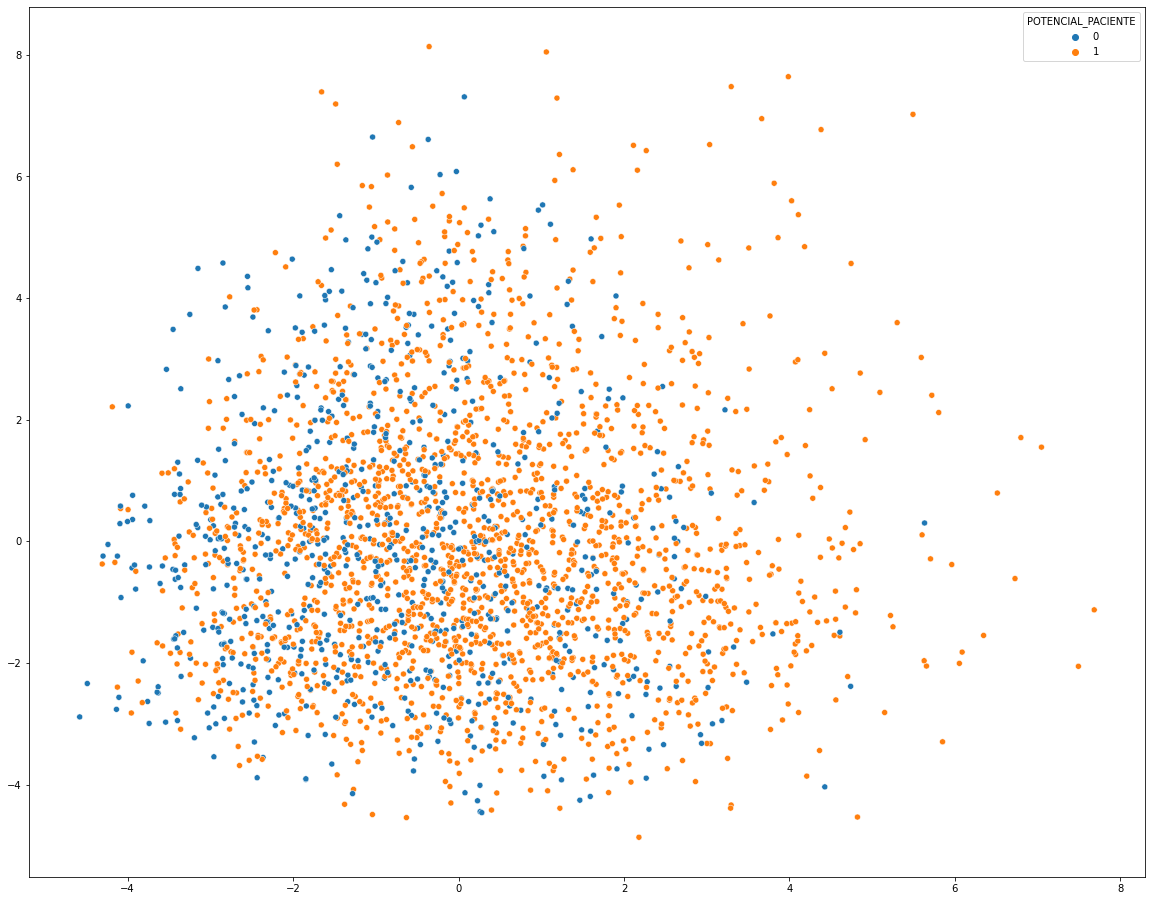

In [276]:
plt.rcParams["figure.figsize"] = (20,16)
sns.scatterplot(pc[:,2], pc[:,1], hue=y)
plt.show()

In [ ]:
# Separabilidad Segmentacion Clientes

In [126]:
X = new_nha.drop('SEGMENTACION_PACIENTE',axis=1)
y = new_nha['SEGMENTACION_PACIENTE']

X_std = StandardScaler().fit_transform(X) 

pca = PCA(n_components=10)

pc = pca.fit_transform(X_std)

pca.explained_variance_ratio_

array([0.10103834, 0.08478341, 0.0727132 , 0.05728116, 0.05222993,
       0.04441569, 0.03803439, 0.03427888, 0.03395465, 0.03177366])

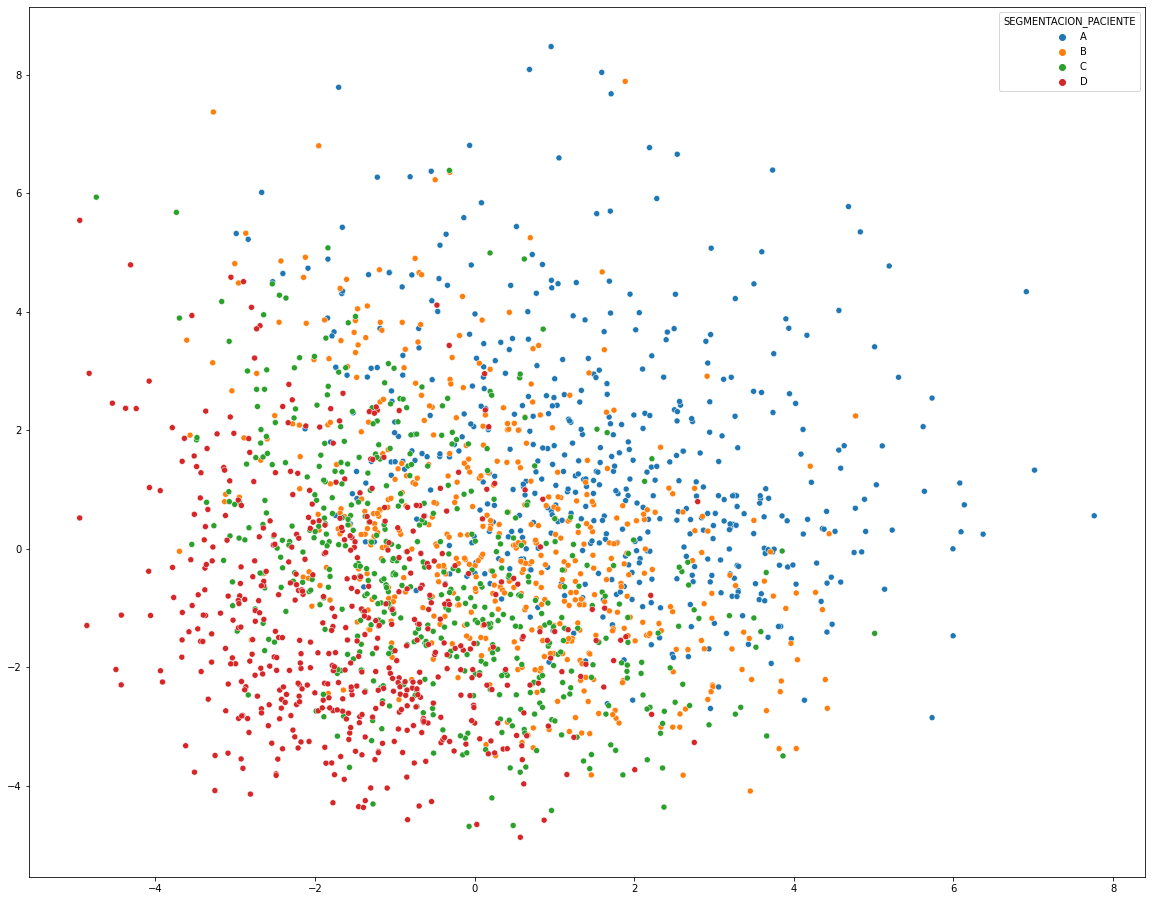

In [127]:
plt.rcParams["figure.figsize"] = (20,16)
sns.scatterplot(pc[:,2], pc[:,1], hue=y)
plt.show()

### MODEL EVALUATION

In [111]:
X = new_nha.drop('SEGMENTACION_PACIENTE',axis=1)
y = new_nha['SEGMENTACION_PACIENTE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
def pipe(nombre_modelo,modelo):


    pipe=Pipeline([('MMS',MinMaxScaler()),(nombre_modelo,modelo)])
    pipe.fit(X_train,y_train)
    print(nombre_modelo,'score:')
    print('Test_score',round(pipe.score(X_test,y_test),3))
    print('Train score', round(pipe.score(X_train,y_train),3))
    print('')
    plt.rcParams["figure.figsize"] = (10,10)
    print('Confusion matrix:') 
    



    plot_confusion_matrix(pipe.fit(X_train, y_train), X_test, y_test,cmap=plt.cm.Blues)
    plt.show()
    prediction = pipe.predict(X_test)
    print(classification_report(y_test, prediction)) 

LogisticRegression score:
Test_score 0.819
Train score 0.906

Confusion matrix:


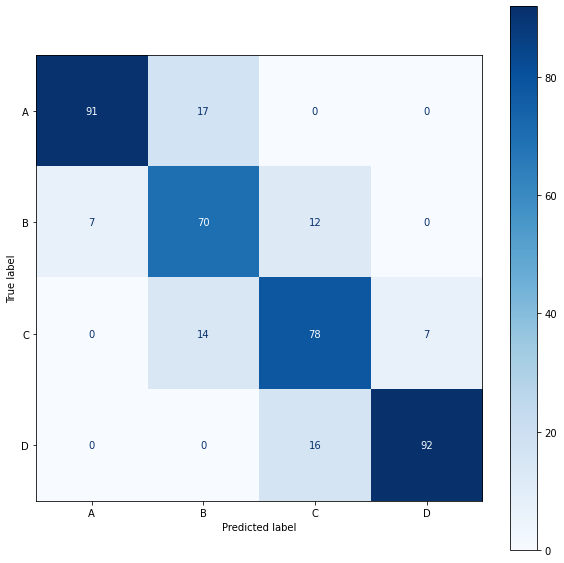

              precision    recall  f1-score   support

           A       0.93      0.84      0.88       108
           B       0.69      0.79      0.74        89
           C       0.74      0.79      0.76        99
           D       0.93      0.85      0.89       108

    accuracy                           0.82       404
   macro avg       0.82      0.82      0.82       404
weighted avg       0.83      0.82      0.82       404



In [297]:
pipe('LogisticRegression',LogisticRegression())

SVC score:
Test_score 0.757
Train score 0.907

Confusion matrix:


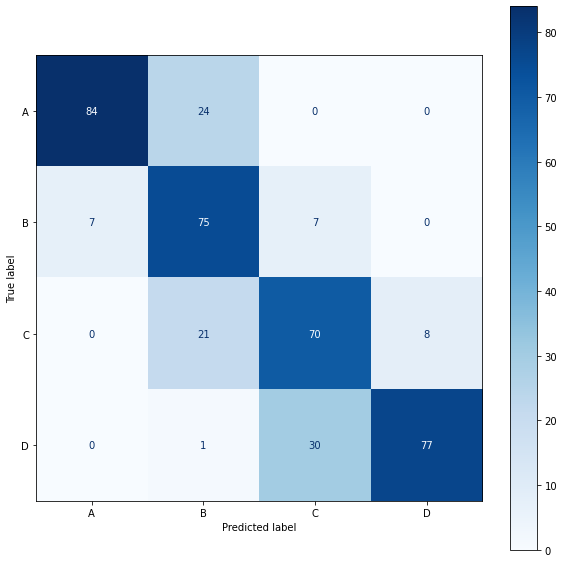

              precision    recall  f1-score   support

           A       0.92      0.78      0.84       108
           B       0.62      0.84      0.71        89
           C       0.65      0.71      0.68        99
           D       0.91      0.71      0.80       108

    accuracy                           0.76       404
   macro avg       0.78      0.76      0.76       404
weighted avg       0.79      0.76      0.76       404



In [298]:
pipe('SVC',SVC())

## FINE TUNNING

In [115]:
pipe = Pipeline([('MMS', MinMaxScaler()),('LogisticRegression',LogisticRegression())])

param_grid = [
    {'LogisticRegression' : [LogisticRegression()],
     'LogisticRegression__penalty' : ['l1', 'l2'],
    'LogisticRegression__C' : np.logspace(-4, 4, 20),
    'LogisticRegression__solver' : ['liblinear']}]
lr_model= GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MMS', MinMaxScaler()),
                                       ('LogisticRegression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'LogisticRegression': [LogisticRegression(C=206.913808111479,
                                                                    penalty='l1',
                                                                    solver='liblinear')],
                          'LogisticRegression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'LogisticRegression__penalty': ['l1', 'l2'],
                          '

In [294]:
def tuned_model(nombre_modelo,ml_model):
    ml_model = ml_model.best_estimator_

    ml_model.fit(X_train, y_train)

    print(nombre_modelo,'score:')
    print('Test_score',round(ml_model.score(X_test,y_test),3))
    print('Train score', round(ml_model.score(X_train,y_train),3))
    
    plt.rcParams["figure.figsize"] = (10,10)
    print('')
    print('Confusion matrix:') 

    plot_confusion_matrix(ml_model.fit(X_train, y_train), X_test, y_test,cmap=plt.cm.Blues)
    plt.show()

    prediction = ml_model.predict(X_test)
    print('\033[1m' +'\nClassification report:' + '\033[0m' +'\n')      
    print(classification_report(y_test, prediction))


LogisticRegression_grid score:
Test_score 0.854
Train score 0.911

Confusion matrix:


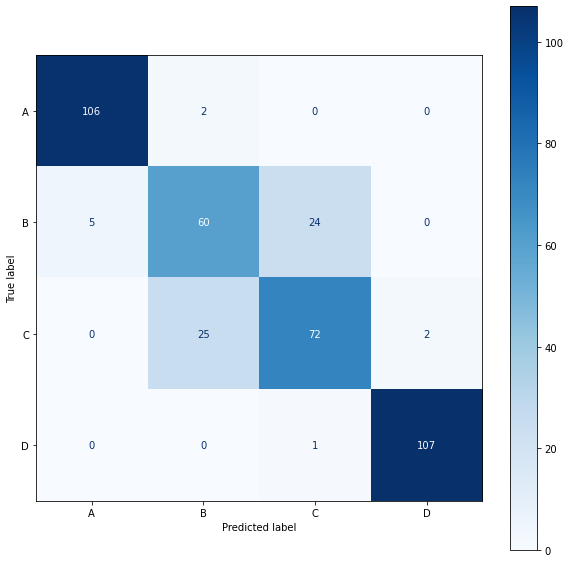


Classification report:

              precision    recall  f1-score   support

           A       0.95      0.98      0.97       108
           B       0.69      0.67      0.68        89
           C       0.74      0.73      0.73        99
           D       0.98      0.99      0.99       108

    accuracy                           0.85       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.85      0.85      0.85       404



In [295]:
tuned_model('LogisticRegression_grid',lr_model)

## BUSINESS INSGIHTS

In [118]:
seg=new_nha[['ID','PATIENT_SCORE','SEGMENTACION_PACIENTE']]

In [119]:
nha=pd.merge(nha,seg,on='ID')

In [156]:
# Calculo de la media de los valores de las variables númericas

nha_numerical_columns=nha.select_dtypes(exclude='object')
nha_numerical_columns.drop(columns='ID',inplace=True)
nha_numerical_columns=nha_numerical_columns.columns
df_numerical=nha.groupby('SEGMENTACION_PACIENTE')[nha_numerical_columns].mean()

In [136]:
# Calculo de la moda de los valores de las variables, de cada uno de los segmentos de los potenciales pacientes
nha_categorical_columns=nha.select_dtypes(include='object')
nha_categorical_columns.drop(columns='SEGMENTACION_PACIENTE',inplace=True)
nha_categorical_columns=nha_categorical_columns.columns
df_categorical=nha.groupby('SEGMENTACION_PACIENTE')[nha_categorical_columns].agg(lambda x:x.v

In [ ]:
# Resumen Perfil de Segmento de Paciente

In [159]:
nha_sum = pd.concat([df_categorical,df_numerical],axis=1)
nha_sum

,GENERO,LUGAR_NACIMIENTO,ESTADO_CIVIL,INGRESOS_DISCAPACIDAD,INGRESOS_SEGURIDAD_SOCIAL,SEGURO_MÉDICO,ASMA,CANCER,HA_ESTADO_EMBARAZADA,ENFERMEDAD_CARDIACA,EDAD,NIVEL_FORMACION,RESIDENTES_HOGAR,INGRESOS_HOGAR,PESO_KG,ALTURA_CM,CIRCUM_CINTURA,PULSO_60s,PRESION_SISTOLICA,PRESION_DIASTOLICA,BEBIDAS_ALCOHOL_DIA,MINUTOS_OUTDOOR,NUM_COMIDAS FUERA_7 DIAS,NUM_FAST FOOD_7_DIAS,FREC.CONSUMO_DROGAS,ATENCIÓN_MÉDICA_ULTIMO_AÑO,FRECUENCIA_BAJA_AUTOESTIMA,FRECUENCIA_POCA_ENERGIA,DIABETES_TIPO_1,HORAS_TRABAJADAS,MIN_ACTIVIDAD_FISICA_DIA,MINUTOS_ACTIVIDAD_SEDENTARIA,VECES_EMBARAZADA,HORAS_DE_SUEÑO,FUMA,AUTOEVALUACIÓN_DIETA,ALIMENTACIÓN_DESEQUILIBRADA,PESO_KG_1YAGO,COLESTEROL_TOTAL_mg_dl,DIFERENCIA_PESO_ULTIMO_AÑO,PERDIDA_PESO_ULTIMO_AÑO,ESTADO PESO,DIABETES_TIPO_2,%VARIACION_PESO,POTENCIAL_PACIENTE,PATIENT_SCORE
SEGMENTACION_PACIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,HOMBRE,USA,SOLTERO,NO,NO,SI,NO,NO,NO,NO,48.011881,3.495050,3.164356,8.071287,106.299406,169.799485,117.441386,74.574257,127.405941,73.390099,1.924752,62.988119,2.724752,2.724752,0.407921,2.718812,0.419802,0.944554,1.760396,25.495050,24.120792,437.584158,1.623762,6.738614,1.055446,3.829703,0.643564,166.661980,187.875248,-60.362574,0.287129,2.829703,1.097030,-0.642165,1,3.618920
B,HOMBRE,USA,CASADO,NO,NO,SI,NO,NO,NO,NO,46.529762,3.575397,3.178571,8.619048,87.596230,168.093492,103.974206,72.103175,121.436508,70.055556,1.906746,68.172619,2.371032,2.371032,0.359127,2.440476,0.281746,0.817460,1.946429,26.339286,28.738095,417.103175,1.424603,6.668651,0.968254,3.444444,0.500000,99.739286,191.843254,-12.143056,0.293651,2.474206,0.501984,-0.144899,1,2.887746
C,MUJER,USA,CASADO,NO,NO,SI,NO,NO,NO,NO,46.150794,3.757937,3.069444,9.164683,79.142262,167.417004,97.127183,71.595238,120.869048,69.825397,1.821429,59.390873,2.067460,2.067460,0.279762,2.438492,0.232143,0.750000,1.978175,25.287698,26.904762,414.156746,1.400794,6.904762,0.753968,2.950397,0.406746,136.641667,191.142857,-57.499405,0.337302,2.105159,0.222222,-0.720043,1,2.448594
D,MUJER,USA,CASADO,NO,NO,SI,NO,NO,NO,NO,46.540594,4.011881,2.837624,9.702970,68.269307,165.627921,88.437030,71.580198,118.637624,67.627723,1.803960,51.342574,1.598020,1.598020,0.378218,2.421782,0.196040,0.671287,2.003960,22.611881,29.881188,424.396040,1.304950,7.041584,0.912871,2.203960,0.231683,67.227525,187.659406,1.041782,0.378218,1.556436,0.093069,0.011906,1,1.939271


In [286]:
@interact(x=new_nha.columns,y=new_nha.columns)
def explore_2(x,y):
    sns.boxplot(data=new_nha,x=x,y=y,showfliers=False)

interactive(children=(Dropdown(description='x', options=('ID', 'EDAD', 'NIVEL_FORMACION', 'RESIDENTES_HOGAR', …

<AxesSubplot:xlabel='ALTURA_CM', ylabel='PESO_KG'>

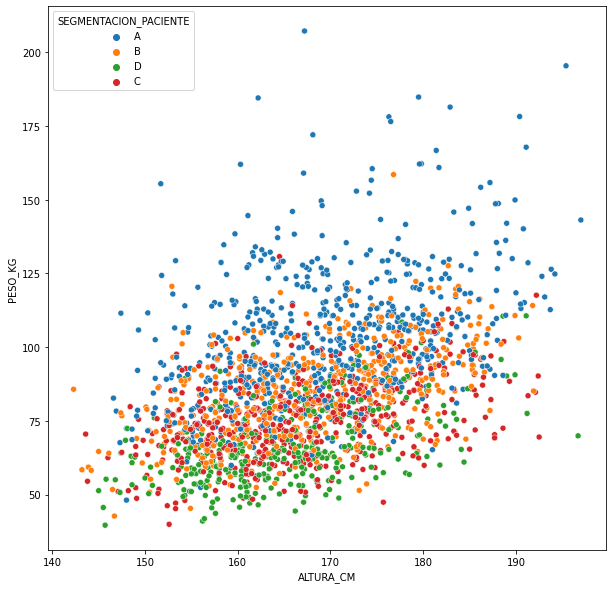

In [732]:
sns.scatterplot(data=nha,x='ALTURA_CM',y='PESO_KG',hue='SEGMENTACION_PACIENTE')

In [287]:
new_nha[['SEGMENTACION_PACIENTE','INGRESOS_HOGAR']].pivot(columns='SEGMENTACION_PACIENTE',values='INGRESOS_HOGAR').iplot(kind='box',boxpoints='outliers')